In [46]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import shap
import lime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [47]:
df = pd.read_csv("/kaggle/input/fantasy-football/cleaned_merged_seasons.csv")
teams = pd.read_csv("/kaggle/input/fantasy-football/master_team_list.csv")

df.head(), teams.head()

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.


(  season_x                name position team_x  assists  bonus  bps  \
 0  2016-17     Aaron Cresswell      DEF    NaN        0      0    0   
 1  2016-17        Aaron Lennon      MID    NaN        0      0    6   
 2  2016-17        Aaron Ramsey      MID    NaN        0      0    5   
 3  2016-17  Abdoulaye Doucouré      MID    NaN        0      0    0   
 4  2016-17        Adam Forshaw      MID    NaN        0      0    3   
 
    clean_sheets  creativity  element  ...  team_h_score  threat  total_points  \
 0             0         0.0      454  ...           2.0     0.0             0   
 1             0         0.3      142  ...           1.0     0.0             1   
 2             0         4.9       16  ...           3.0    23.0             2   
 3             0         0.0      482  ...           1.0     0.0             0   
 4             0         1.3      286  ...           1.0     0.0             1   
 
    transfers_balance  transfers_in transfers_out  value  was_home  \
 0

In [48]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             76317 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

In [49]:
df.describe() 

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
count,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,...,96169.000000,96169.000000,96169.000000,96169.000000,9.616900e+04,9.616900e+04,9.616900e+04,96169.000000,96169.000000,96169.000000
mean,0.041042,0.108715,6.080275,0.106739,4.734000,327.063264,198.413824,0.495887,0.045514,1.715793,...,1.265158,1.516393,5.287598,1.379270,1.677100e+03,1.454716e+04,1.286945e+04,51.352390,0.053167,20.772099
std,0.215378,0.492334,9.850595,0.308783,10.689879,194.313766,108.884200,0.974269,0.233644,3.042551,...,1.229086,1.349184,13.368420,2.542535,6.581628e+04,5.725343e+04,4.840128e+04,12.667432,0.224367,10.941742
min,0.000000,0.000000,-21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.000000,-2.180978e+06,0.000000e+00,0.000000e+00,37.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,159.000000,105.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-1.374000e+03,4.600000e+01,1.280000e+02,44.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.000000,203.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,-5.800000e+01,4.380000e+02,1.104000e+03,48.000000,0.000000,22.000000
75%,0.000000,0.000000,10.000000,0.000000,2.400000,486.000000,293.000000,1.000000,0.000000,2.500000,...,2.000000,2.000000,2.000000,2.000000,7.900000e+01,5.042000e+03,7.562000e+03,54.000000,0.000000,30.000000
max,4.000000,3.000000,128.000000,1.000000,170.900000,778.000000,380.000000,9.000000,4.000000,32.800000,...,7.000000,9.000000,186.000000,29.000000,1.983733e+06,2.104464e+06,2.233619e+06,133.000000,1.000000,38.000000


In [50]:
original_data = df.shape
print(f"Original dataset shape: {original_data}")


Original dataset shape: (96169, 37)


In [51]:
print("Missing values in main dataset:")
null_counts = df.isnull().sum() 
print(null_counts[null_counts > 0])
print("\nPercentage of null values:")
print((null_counts[null_counts > 0] / len(df) * 100).round(2))

Missing values in main dataset:
team_x    19852
dtype: int64

Percentage of null values:
team_x    20.64
dtype: float64


<Axes: >

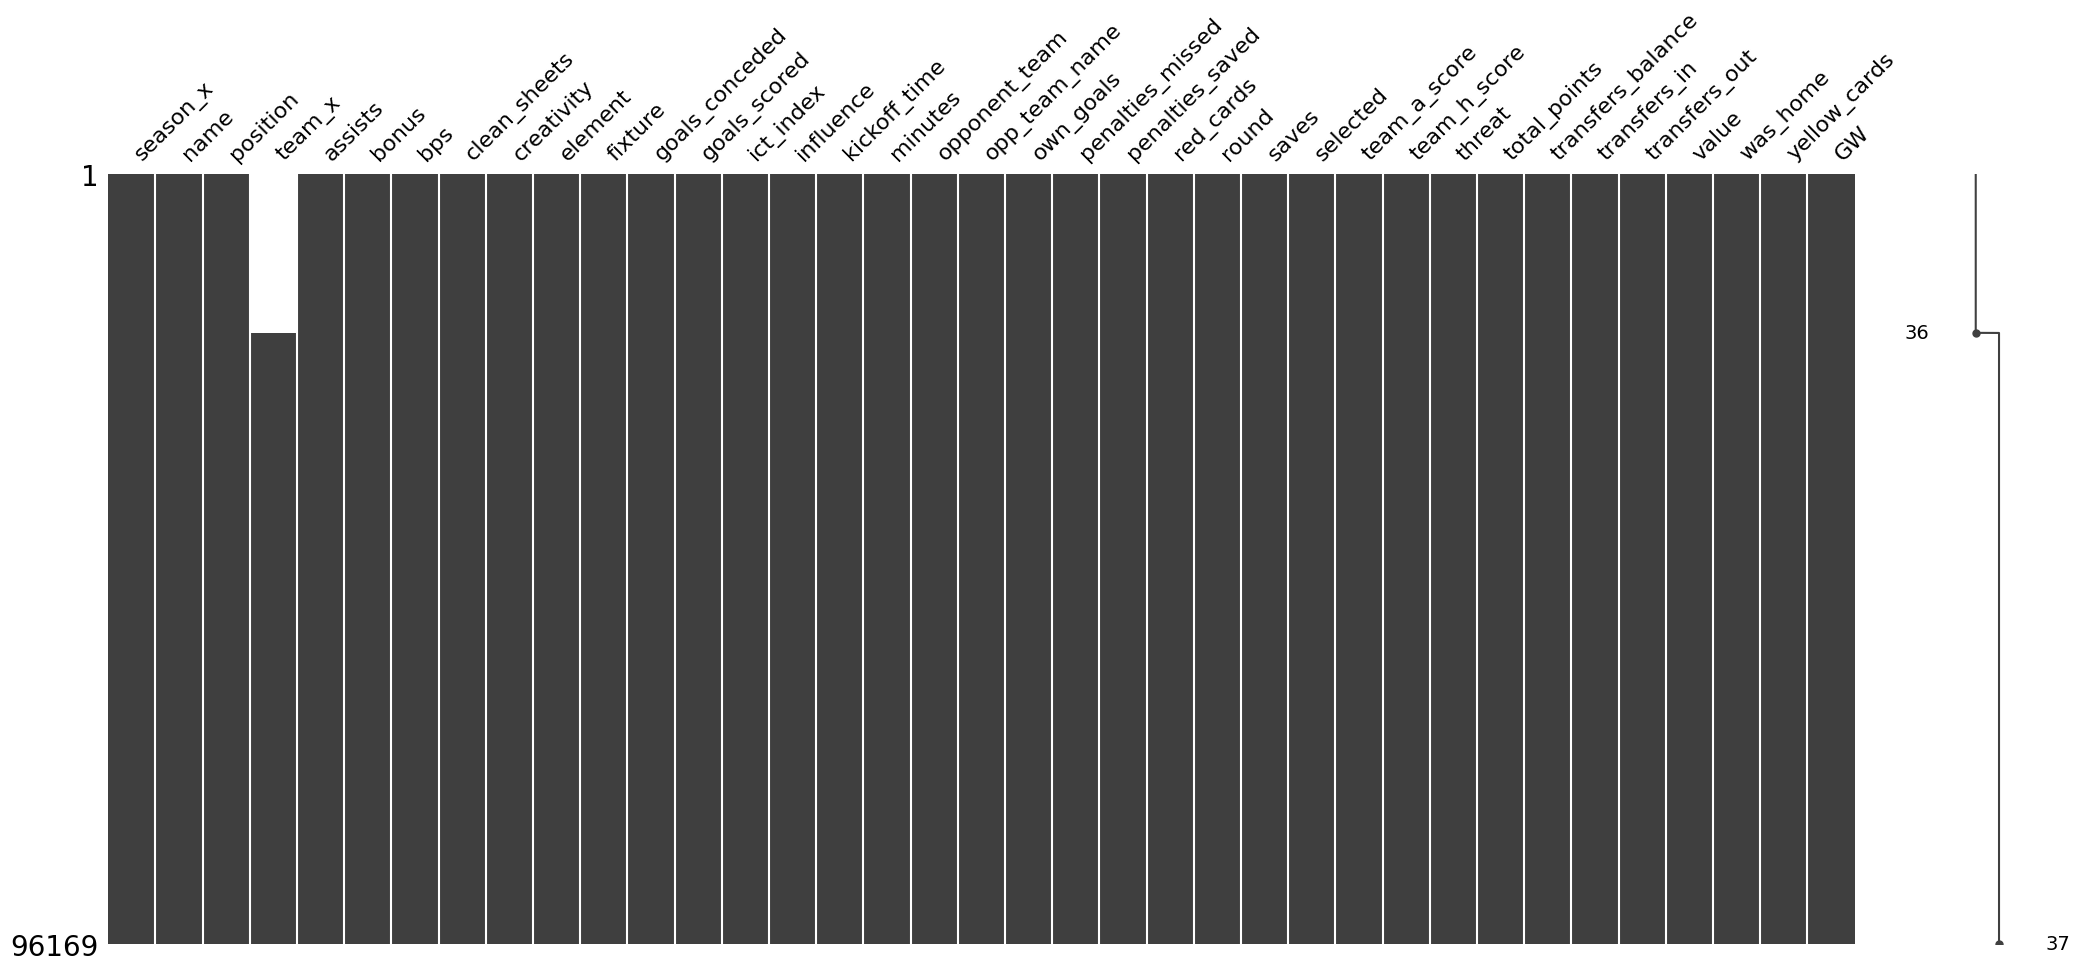

In [52]:
msno.matrix(df)


In [53]:
# Fill missing team names with 'Unknown'
df['team_x'] = df['team_x'].fillna('Unknown')

<Axes: >

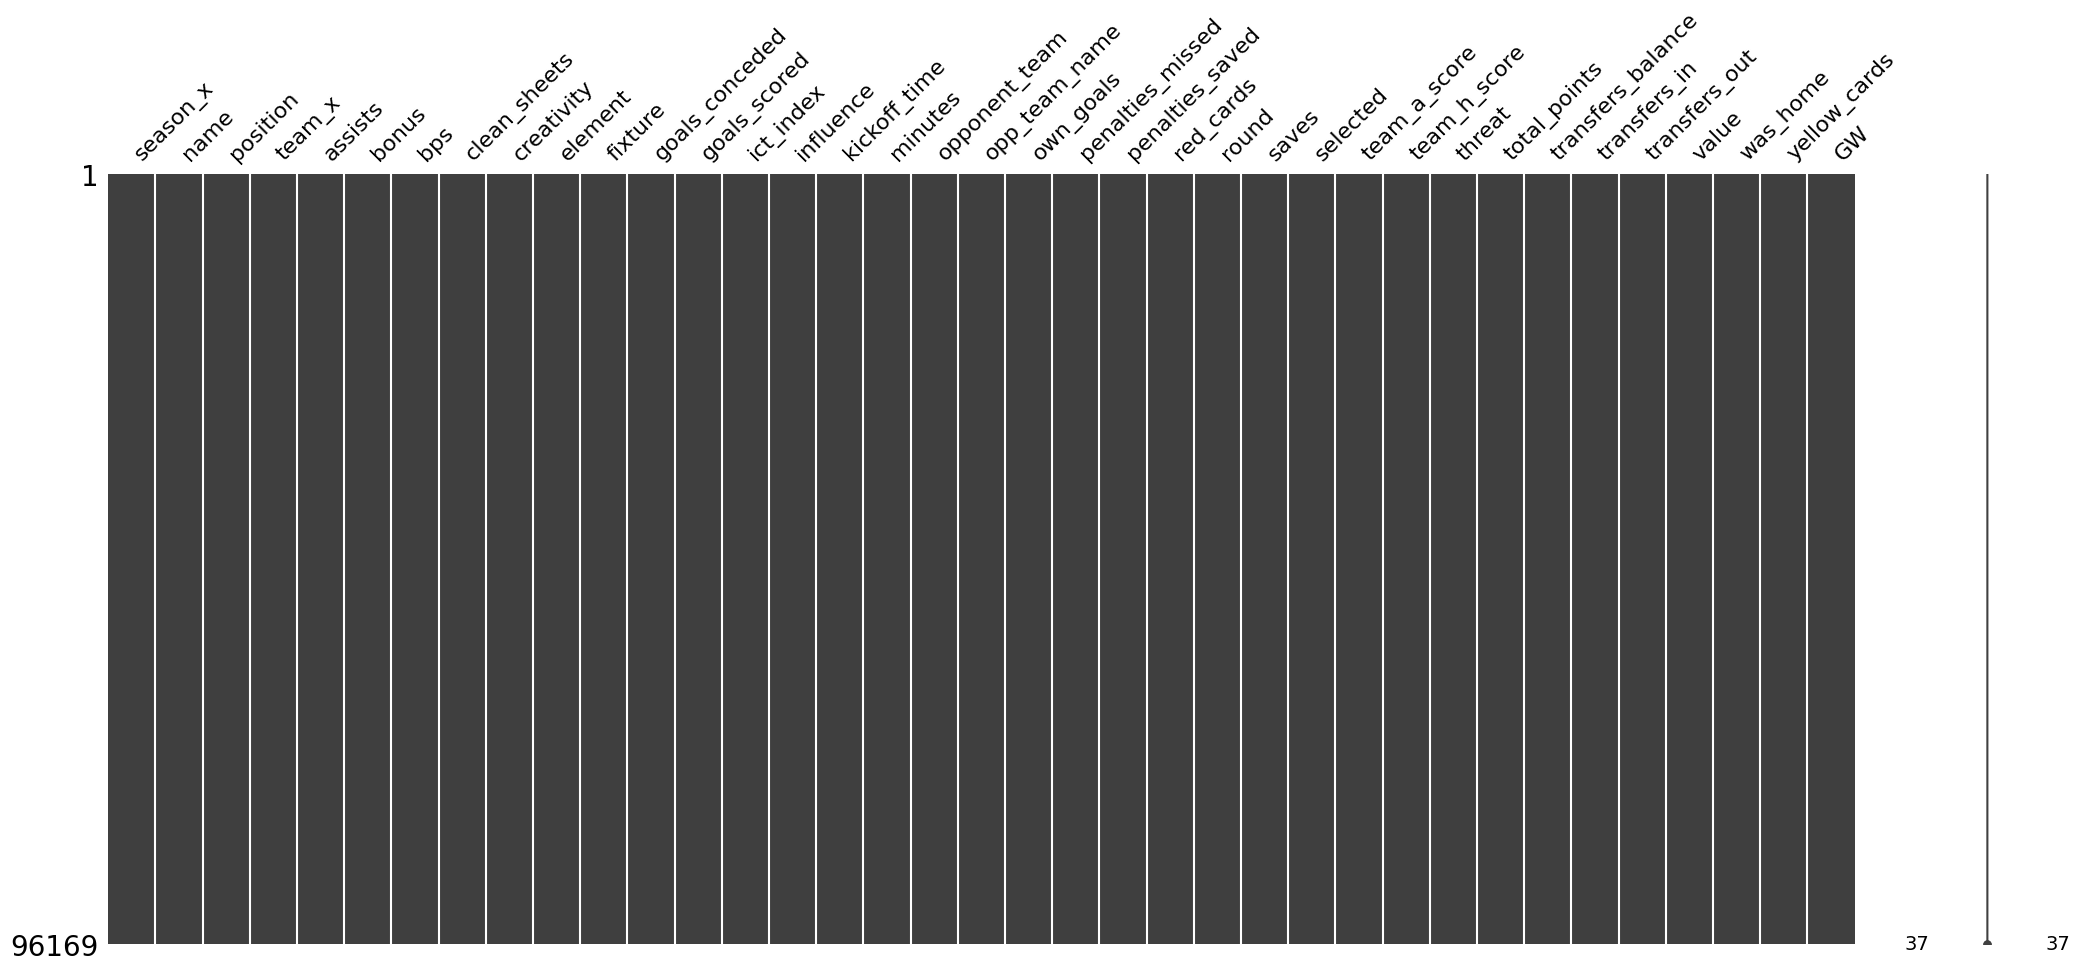

In [54]:
msno.matrix(df)


In [55]:
# STEP 1: DATA CLEANING

print(f"Original dataset shape: {original_data}")

# Remove duplicates if any
df_cleaned = df.drop_duplicates()
print(f"After removing duplicates: {df_cleaned.shape}")

Original dataset shape: (96169, 37)
After removing duplicates: (96169, 37)


In [56]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)])

Number of duplicate rows: 0


In [57]:

print(f"Original dataset shape: {original_data}")

# Drop rows where any of the main columns (name, team_x, position, GW) are null
df_cleaned = df.dropna(subset=['name', 'team_x', 'position', 'GW'])

# Summary statistics before cleaning
print(f"After removing duplicates: {df_cleaned.shape}")

Original dataset shape: (96169, 37)
After removing duplicates: (96169, 37)


In [58]:
print(df['position'].value_counts())


position
MID    39163
DEF    33683
FWD    12669
GK     10553
GKP      101
Name: count, dtype: int64


In [59]:
df['position'] = df['position'].replace('GKP', 'GK')


In [60]:
print(df['position'].value_counts())


position
MID    39163
DEF    33683
FWD    12669
GK     10654
Name: count, dtype: int64


In [61]:
print((df['GW'] == df['round']).all())


True


In [62]:
df = df.drop(columns=['round'])


In [63]:
print(df.columns.tolist())


['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW']


In [64]:
# Create the directory if it doesn't exist
os.makedirs("../data", exist_ok=True)

# Save cleaned dataset inside the 'data' folder directly (not inside 'raw')
df.to_csv("../data/cleaned_merged_seasons.csv", index=False)

print("✅ Cleaned dataset saved successfully in the data folder!")

✅ Cleaned dataset saved successfully in the data folder!


In [65]:
df = pd.read_csv("../data/cleaned_merged_seasons.csv")
df = df.sort_values(['name', 'season_x', 'GW']).copy()

df['form'] = (
    df.groupby(['name','season_x'])['total_points']
      .transform(lambda s: s.shift(1).rolling(window=4, min_periods=1).mean() / 10)
)

player = df['name'].iloc[0]  
check = df[df['name'] == player][['season_x','GW','total_points','form']].head(20)
print(player)
print(check)

Aaron Connolly
      season_x  GW  total_points      form
19852  2020-21   1             1       NaN
20277  2020-21   2             8  0.100000
20816  2020-21   3             2  0.450000
21370  2020-21   4             2  0.366667
21932  2020-21   5             4  0.325000
22519  2020-21   6             0  0.400000
23109  2020-21   7             0  0.200000
23706  2020-21   8             1  0.150000
24306  2020-21   9             0  0.125000
24907  2020-21  10             2  0.025000
25510  2020-21  11             2  0.075000
26051  2020-21  12             1  0.125000
26658  2020-21  13             0  0.125000
27265  2020-21  14             2  0.125000
27876  2020-21  15             0  0.125000
28489  2020-21  16             0  0.075000
28981  2020-21  17             5  0.050000
29539  2020-21  18             0  0.175000
29939  2020-21  19             0  0.125000
30892  2020-21  20             0  0.125000


invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


In [66]:
df.to_csv("../data/cleaned_merged_seasons.csv", index=False)

position
MID    11384.4
DEF     8705.2
FWD     3975.8
GK      2463.2
Name: total_points, dtype: float64


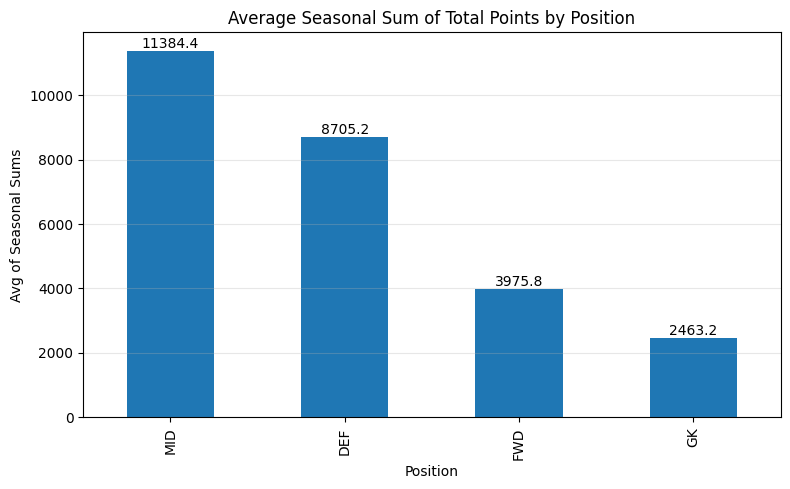

In [67]:
per_season_points = (
    df.groupby(['season_x', 'position'])['total_points']
      .sum()
      .reset_index()
)

position_avg_season_sum = (
    per_season_points.groupby('position')['total_points']
      .mean()
      .sort_values(ascending=False)

)

print(position_avg_season_sum)



bars = position_avg_season_sum.plot(kind='bar', figsize=(9,5))
plt.title('Average Seasonal Sum of Total Points by Position')
plt.xlabel('Position'); plt.ylabel('Avg of Seasonal Sums')
plt.grid(axis='y', alpha=0.3)
plt.bar_label(bars.containers[0])

plt.show()

Top 5 players by total points during the 2022-23 season:
name
Erling Haaland     272
Harry Kane         263
Mohamed Salah      239
Martin Ødegaard    212
Marcus Rashford    205
Name: total_points, dtype: int64


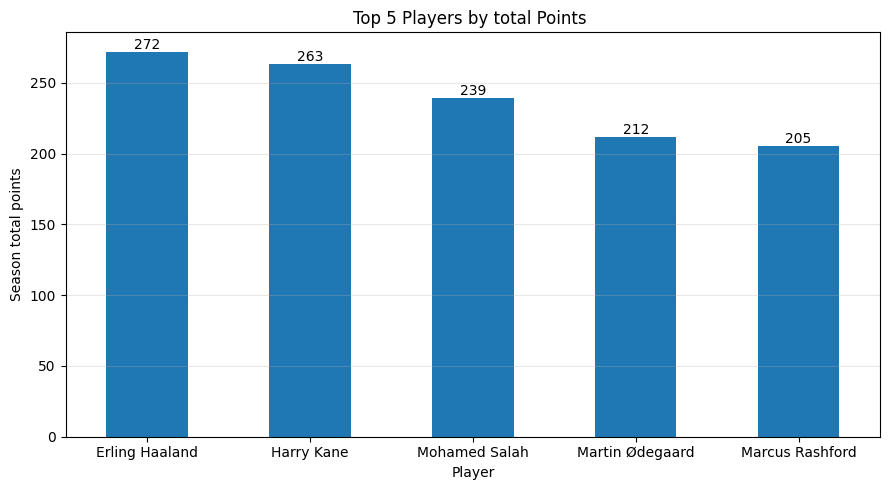

In [68]:
season_df = df[df['season_x'] == '2022-23'].copy()

top5_points = (
    season_df.groupby('name')['total_points']
             .sum()
             .sort_values(ascending=False)
             .head(5)
)


print("Top 5 players by total points during the 2022-23 season:")
print(top5_points)

ax = top5_points.plot(kind='bar', figsize=(9,5))
plt.title(f'Top 5 Players by total Points ')
plt.xlabel('Player'); plt.ylabel('Season total points')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0])  
plt.tight_layout()
plt.show()

Top 5 by the average form:
name
Erling Haaland              0.762838
Harry Kane                  0.652928
Mohamed Salah               0.638063
Martin Ødegaard             0.565541
Gabriel Martinelli Silva    0.561712
Name: form, dtype: float64


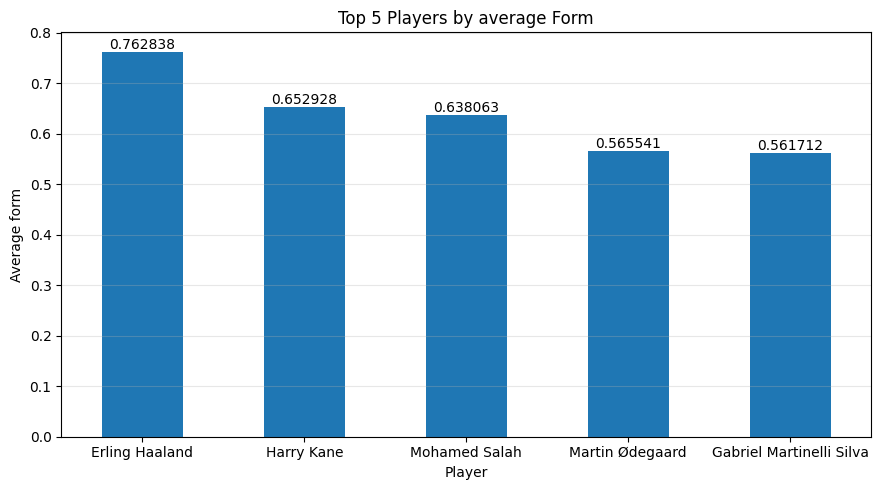

In [69]:

top5_form = (
    season_df.groupby('name')['form']
             .mean()
             .sort_values(ascending=False)
             .head(5)
)

print("Top 5 by the average form:")
print(top5_form)

ax = top5_form.plot(kind='bar', figsize=(9,5))
plt.title(f'Top 5 Players by average Form')
plt.xlabel('Player'); plt.ylabel('Average form')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0])  
plt.tight_layout()
plt.show()

In [70]:

common_players = set(top5_form.index) & set(top5_points.index)
print("Players in both lists:", common_players if common_players else "None")

Players in both lists: {'Martin Ødegaard', 'Harry Kane', 'Mohamed Salah', 'Erling Haaland'}


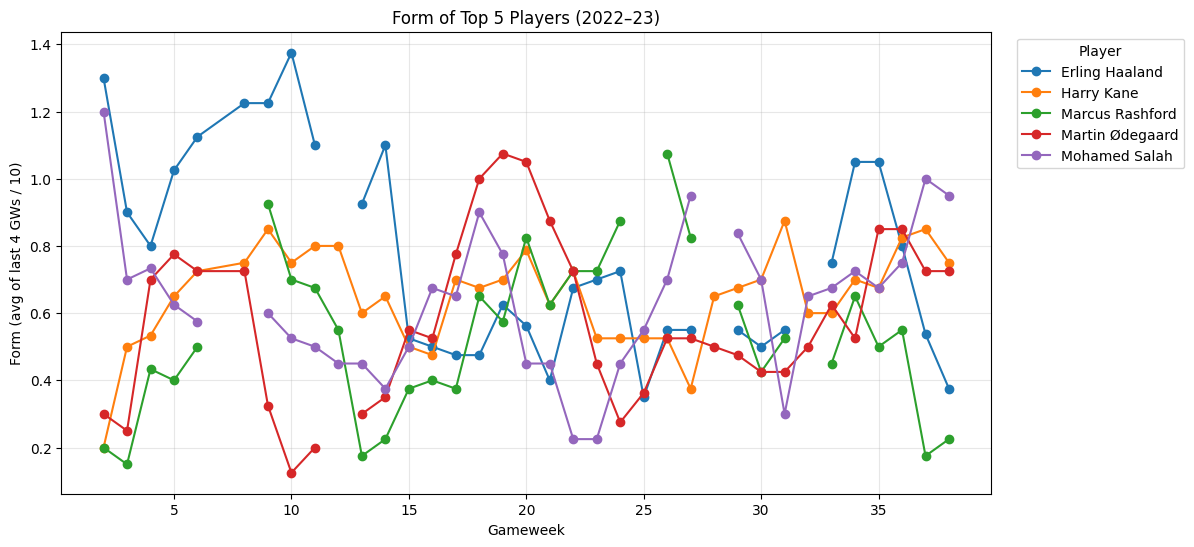

In [71]:
names = list(top5_points.index)
wide = season_df[season_df['name'].isin(names)].pivot_table(
    index='GW', columns='name', values='form'
)
ax = wide.plot(figsize=(12,6), marker='o')
plt.title('Form of Top 5 Players (2022–23)')
plt.xlabel('Gameweek'); plt.ylabel('Form (avg of last 4 GWs / 10)')
plt.legend(title='Player', bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


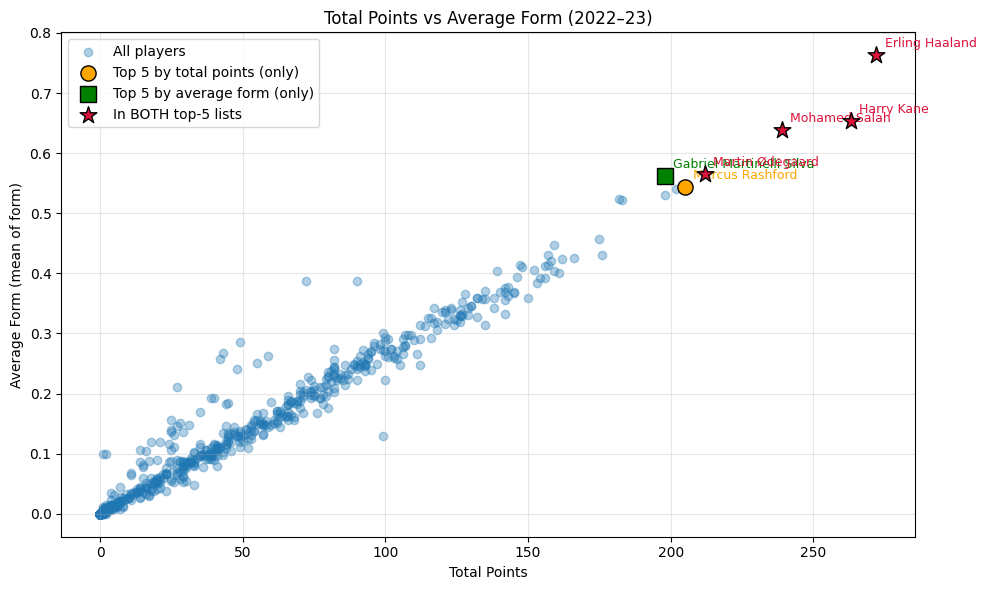

In [72]:


season_totals = season_df.groupby('name')['total_points'].sum()
season_form   = season_df.groupby('name')['form'].mean()

# sets
both   = set(top5_points.index) & set(top5_form.index)
only_p = set(top5_points.index) - both     
only_f = set(top5_form.index)   - both    

plt.figure(figsize=(10,6))

plt.scatter(season_totals, season_form, alpha=0.35, label='All players', zorder=1)


if only_p:
    plt.scatter(season_totals[list(only_p)], season_form[list(only_p)],
                s=120, color='orange', edgecolors='black', linewidth=1.0,
                label='Top 5 by total points (only)', zorder=3)

if only_f:
    plt.scatter(season_totals[list(only_f)], season_form[list(only_f)],
                s=120, color='green', marker='s', edgecolors='black', linewidth=1.0,
                label='Top 5 by average form (only)', zorder=3)


if both:
    plt.scatter(season_totals[list(both)], season_form[list(both)],
                s=160, color='crimson', marker='*', edgecolors='black', linewidth=1.0,
                label='In BOTH top-5 lists', zorder=4)


def annotate(names, color):
    for name in names:
        x, y = season_totals[name], season_form[name]
        plt.annotate(name, (x, y), xytext=(6,6), textcoords='offset points',
                     fontsize=9, color=color)

annotate(only_p, 'orange')
annotate(only_f, 'green')
annotate(both,   'crimson')

plt.title('Total Points vs Average Form (2022–23)')
plt.xlabel('Total Points'); plt.ylabel('Average Form (mean of form)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


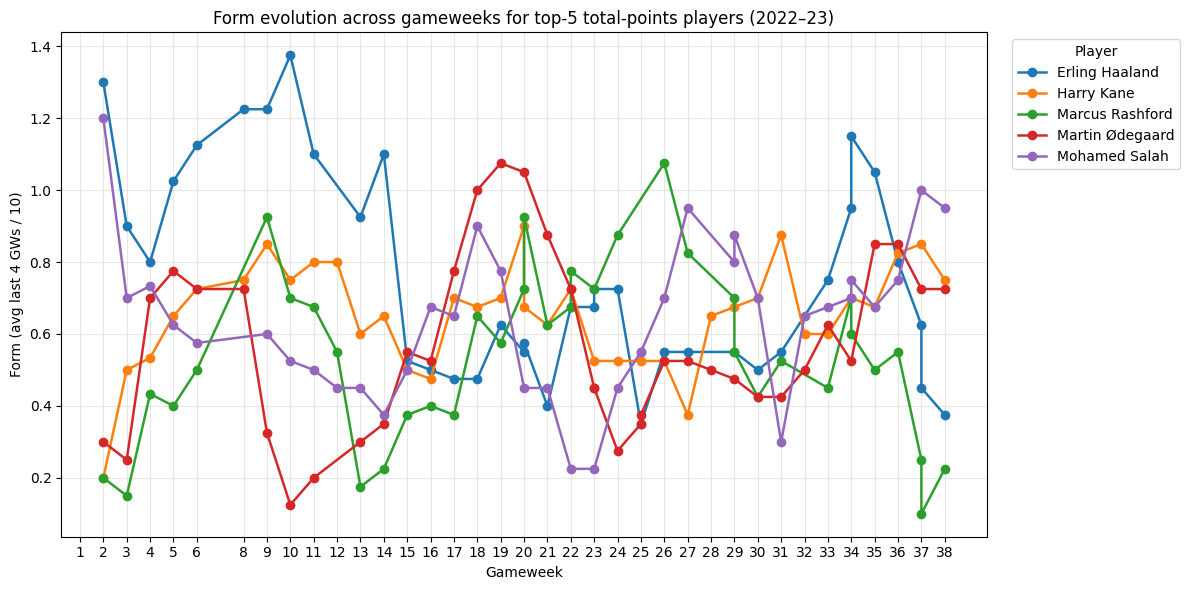

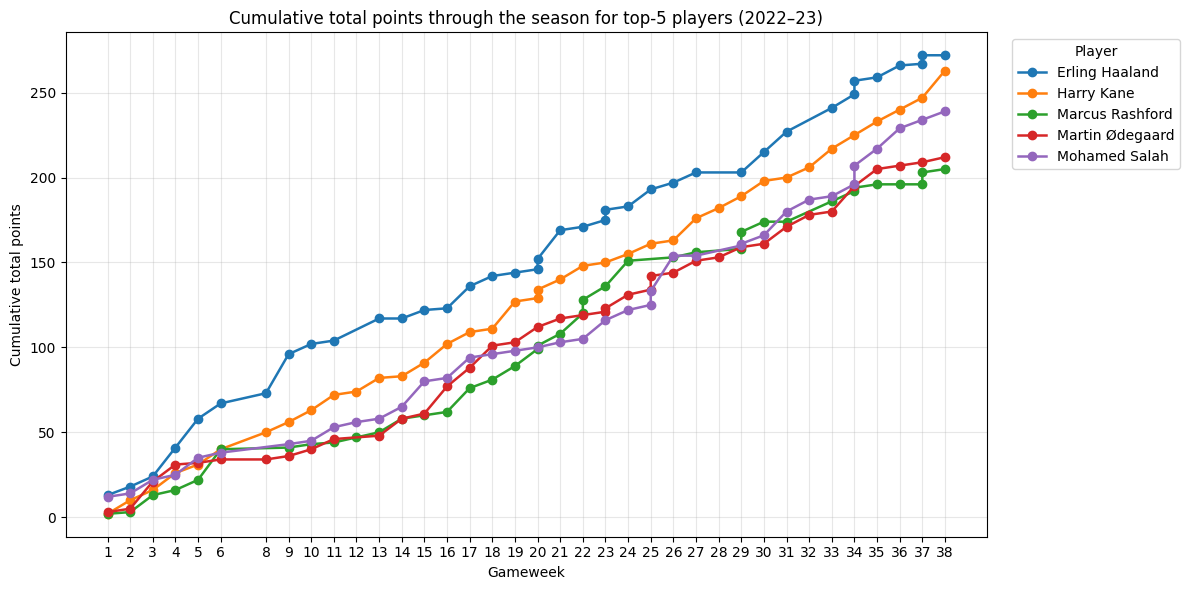

In [73]:


players_to_plot = list(top5_points.index)  
plot_df = (
    season_df[season_df["name"].isin(players_to_plot)]
    .copy()
    .sort_values(["name", "GW"])
)


plt.figure(figsize=(12,6))
for name, g in plot_df.groupby("name"):
    plt.plot(g["GW"], g["form"], marker="o", linewidth=1.8, label=name)

plt.title("Form evolution across gameweeks for top-5 total-points players (2022–23)")
plt.xlabel("Gameweek")
plt.ylabel("Form (avg last 4 GWs / 10)")
plt.grid(alpha=0.3)
plt.legend(title="Player", bbox_to_anchor=(1.02,1), loc="upper left")
plt.xticks(sorted(plot_df["GW"].dropna().unique()))
plt.tight_layout()
plt.show()


cum_df = plot_df.copy()
cum_df["cum_points"] = cum_df.groupby("name")["total_points"].cumsum()

plt.figure(figsize=(12,6))
for name, g in cum_df.groupby("name"):
    plt.plot(g["GW"], g["cum_points"], marker="o", linewidth=1.8, label=name)

plt.title("Cumulative total points through the season for top-5 players (2022–23)")
plt.xlabel("Gameweek")
plt.ylabel("Cumulative total points")
plt.grid(alpha=0.3)
plt.legend(title="Player", bbox_to_anchor=(1.02,1), loc="upper left")
plt.xticks(sorted(cum_df["GW"].dropna().unique()))
plt.tight_layout()
plt.show()


In [74]:
os.makedirs("../data", exist_ok=True)


season_choice = "2022-23"  


top5_points.to_csv(f"../data/top5_by_total_points_{season_choice}.csv", index=False)
top5_form.to_csv(f"../data/top5_by_average_form_{season_choice}.csv", index=False)

print("Saved:")
print(f" - ../data/top5_by_total_points_{season_choice}.csv")
print(f" - ../data/top5_by_average_form_{season_choice}.csv")


Saved:
 - ../data/top5_by_total_points_2022-23.csv
 - ../data/top5_by_average_form_2022-23.csv


In [75]:
df = pd.read_csv("../data/cleaned_merged_seasons.csv")


df_sorted = df.sort_values(["name", "season_x", "GW"]).copy()


df_sorted["upcoming_total_points"] = (
    df_sorted.groupby(["name", "season_x"])["total_points"].shift(-1)
)


before = len(df_sorted)
df_model = df_sorted.dropna(subset=["upcoming_total_points"]).copy()
after = len(df_model)

print("Target created: 'upcoming_total_points'")
print("Rows dropped (dropping NaNs):", before - after)


df_model[["name", "season_x", "GW", "total_points", "upcoming_total_points"]].head(10)



Target created: 'upcoming_total_points'
Rows dropped (dropping NaNs): 2782


,name,season_x,GW,total_points,upcoming_total_points
0,Aaron Connolly,2020-21,1,1,8.0
1,Aaron Connolly,2020-21,2,8,2.0
2,Aaron Connolly,2020-21,3,2,2.0
3,Aaron Connolly,2020-21,4,2,4.0
4,Aaron Connolly,2020-21,5,4,0.0
5,Aaron Connolly,2020-21,6,0,0.0
6,Aaron Connolly,2020-21,7,0,1.0
7,Aaron Connolly,2020-21,8,1,0.0
8,Aaron Connolly,2020-21,9,0,2.0
9,Aaron Connolly,2020-21,10,2,2.0


In [76]:
match_features = [
    "assists", "bonus", "bps", "clean_sheets", "goals_conceded",
    "goals_scored", "minutes", "own_goals", "penalties_missed",
    "penalties_saved", "red_cards", "saves", "yellow_cards",
    "was_home", "team_h_score", "team_a_score", "fixture", "GW"
]


player_features = [
    "position", "creativity", "influence", "threat",
    "ict_index", "value", "form", "selected"
]

features = match_features + player_features

In [77]:

df_enc = pd.get_dummies(df_model, columns=["position"], prefix="pos")
pos_cols = [c for c in df_enc.columns if c.startswith("pos_")]
features_final = [c for c in features if c != "position"] + pos_cols


df_enc[features_final] = df_enc[features_final].fillna(0)

X = df_enc[features_final].copy()
y = df_enc["upcoming_total_points"].astype(float).copy()

print("X shape:", X.shape, "| y shape:", y.shape)


X shape: (93387, 29) | y shape: (93387,)


Correlation of all features:
 minutes             0.477763
form                0.418052
ict_index           0.404483
bps                 0.399808
influence           0.374968
creativity          0.314187
value               0.312058
threat              0.307431
selected            0.274587
goals_conceded      0.269043
clean_sheets        0.239553
bonus               0.181703
goals_scored        0.177151
assists             0.149466
saves               0.124371
yellow_cards        0.117216
penalties_missed    0.035789
pos_FWD             0.028739
own_goals           0.024055
pos_MID             0.024052
penalties_saved     0.015186
team_h_score        0.011252
team_a_score       -0.001656
was_home           -0.016303
red_cards          -0.017656
pos_DEF            -0.024978
pos_GK             -0.030644
fixture            -0.032339
GW                 -0.035828
Name: upcoming_total_points, dtype: float64


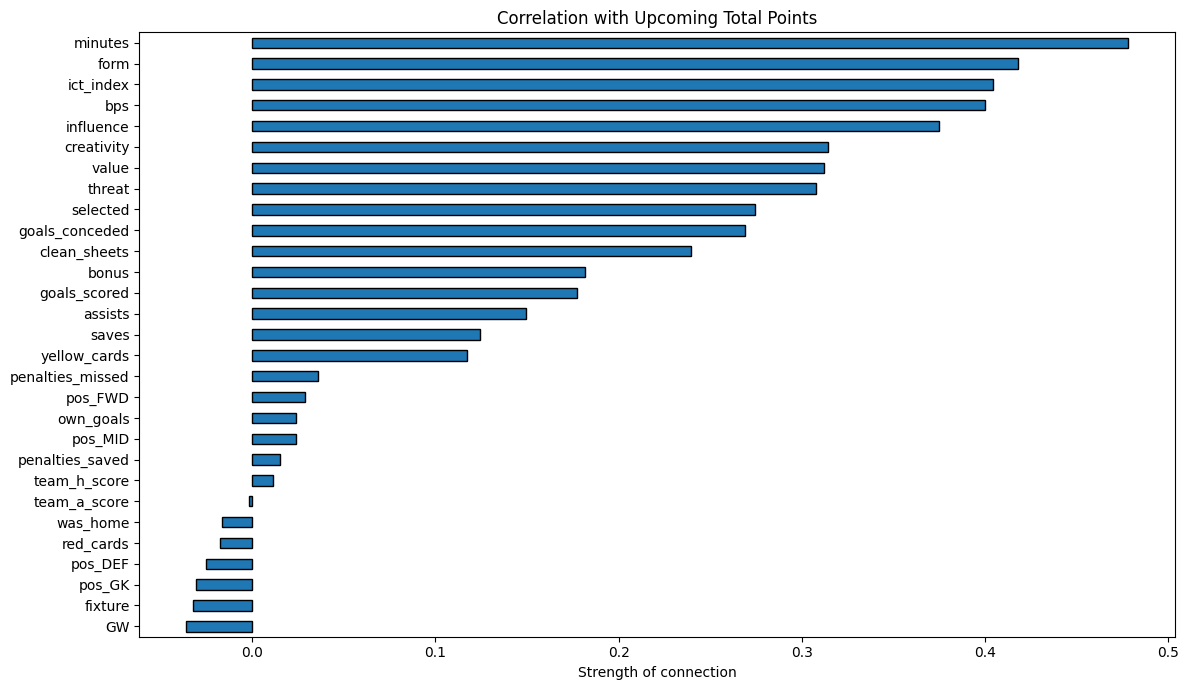

Features with no variation: None


In [78]:

target = "upcoming_total_points"

# Make sure all features are numeric and filled 
df_enc[features_final] = (
    df_enc[features_final]
      .apply(pd.to_numeric, errors="coerce")
      .fillna(0)
)

# Correlation with the target for ALL features 
corr_all = df_enc[features_final + [target]].corr(numeric_only=True)[target]
corr_all = corr_all.reindex(features_final).fillna(0) 


print("Correlation of all features:\n", corr_all.sort_values(ascending=False))


# Plot 
plt.figure(figsize=(12,7))
corr_all.sort_values().plot(kind="barh", edgecolor="black")
plt.title("Correlation with Upcoming Total Points")
plt.xlabel("Strength of connection")
plt.tight_layout()
plt.show()



zero_var = [c for c in features_final if df_enc[c].nunique() <= 1]
print("Features with no variation:", zero_var if zero_var else "None")


In [79]:
# Fill missing values
X = X.fillna(0)

# Feature engineering
df_enc["performance_momentum"] = df_enc["form"] * (df_enc["minutes"] / 90)

if "performance_momentum" not in features_final:
    features_final.append("performance_momentum")

corr_check = df_enc[["performance_momentum", "upcoming_total_points"]].corr().iloc[0,1]
print(f"Correlation between performance_momentum and upcoming_total_points: {corr_check:.3f}")


df_enc["recent_performance_index"] = (df_enc["form"] * df_enc["minutes"]) + df_enc["bps"] + df_enc["bonus"]

if "recent_performance_index" not in features_final:
    features_final.append("recent_performance_index")

# check correlation
corr_check = df_enc[["recent_performance_index", "upcoming_total_points"]].corr().iloc[0,1]
print(f"Correlation between recent_performance_index and upcoming_total_points: {corr_check:.3f}")



# Update X and re-split
X = df_enc[features_final].copy()
y = df_enc["upcoming_total_points"].copy()

Correlation between performance_momentum and upcoming_total_points: 0.426
Correlation between recent_performance_index and upcoming_total_points: 0.463


In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Train rows:", X_train.shape[0], "| Test rows:", X_test.shape[0])


Train rows: 74709 | Test rows: 18678


Before scaling (value): min = 37.000, max = 133.000
After scaling (value):  min = -1.138, max = 6.455


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


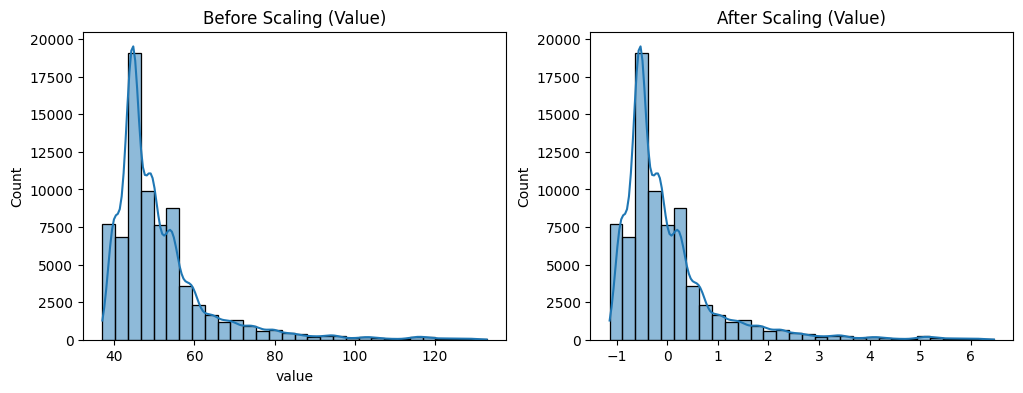

In [81]:
col_index = X_train.columns.get_loc("value")

print(f"Before scaling (value): min = {X_train['value'].min():.3f}, max = {X_train['value'].max():.3f}")
print(f"After scaling (value):  min = {X_train_scaled[:, col_index].min():.3f}, max = {X_train_scaled[:, col_index].max():.3f}")



fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(X_train["value"], bins=30, kde=True, ax=ax[0])
ax[0].set_title("Before Scaling (Value)")
sns.histplot(X_train_scaled[:, X_train.columns.get_loc("value")], bins=30, kde=True, ax=ax[1])
ax[1].set_title("After Scaling (Value)")
plt.show()


In [82]:
from sklearn.ensemble import RandomForestRegressor
import time

print("Random Forest Training Progress")

start = time.time()
rf_progress = RandomForestRegressor(
    n_estimators=0,           
    warm_start=True,          
    max_depth=10,
    min_samples_split=6,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

train_r2, val_r2, val_mae = [], [], []
n_trees = [20, 40, 60, 80, 100]

for n in n_trees:
    rf_progress.n_estimators = n
    rf_progress.fit(X_train, y_train)
    
   
    y_pred_train = rf_progress.predict(X_train)
    y_pred_val = rf_progress.predict(X_test)
    
 
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_test, y_pred_val)
    mae_val = mean_absolute_error(y_test, y_pred_val)
    
    train_r2.append(r2_train)
    val_r2.append(r2_val)
    val_mae.append(mae_val)
    print(f"Epoch {len(train_r2):2d} | Trees: {n:3d} | Train R²: {r2_train:.3f} | Val R²: {r2_val:.3f} | Val MAE: {mae_val:.3f}")



# Time taken
eval_time = time.time() - start
    
print("Random Forest trained successfully")
print(f"Eval Time: {eval_time:.2f} sec")


Random Forest Training Progress
Epoch  1 | Trees:  20 | Train R²: 0.351 | Val R²: 0.291 | Val MAE: 1.202
Epoch  2 | Trees:  40 | Train R²: 0.355 | Val R²: 0.292 | Val MAE: 1.201
Epoch  3 | Trees:  60 | Train R²: 0.355 | Val R²: 0.293 | Val MAE: 1.201
Epoch  4 | Trees:  80 | Train R²: 0.355 | Val R²: 0.293 | Val MAE: 1.201
Epoch  5 | Trees: 100 | Train R²: 0.356 | Val R²: 0.294 | Val MAE: 1.201
Random Forest trained successfully
Eval Time: 3.61 sec


In [83]:
#Evaluation Metrics
rf_progress.fit(X_train, y_train)
y_pred_rf = rf_progress.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)


print("Random Forest Evaluation Results")
print("-----------------------------------")
print(f"MAE   : {mae:.4f}")
print(f"MSE   : {mse:.4f}")
print(f"RMSE  : {rmse:.4f}")
print(f"R²    : {r2:.4f}")

Random Forest Evaluation Results
-----------------------------------
MAE   : 1.2013
MSE   : 4.5665
RMSE  : 2.1369
R²    : 0.2937


Warm-start fitting without increasing n_estimators does not fit new trees.


In [84]:
# ================== PREP: Build Random Forest metrics dicts from your existing variables ==================
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# You already computed these for TEST: mae, mse, rmse, r2 (keep them as-is)
rf_test_metrics = {
    "MAE": float(mae),
    "MSE": float(mse),
    "RMSE": float(rmse),
    "R2": float(r2),
}

# Also compute TRAIN metrics to complete the comparison
y_pred_rf_train = rf_progress.predict(X_train)
_mae_tr = mean_absolute_error(y_train, y_pred_rf_train)
_mse_tr = mean_squared_error(y_train, y_pred_rf_train)
_rmse_tr = float(np.sqrt(_mse_tr))
_r2_tr = r2_score(y_train, y_pred_rf_train)

rf_train_metrics = {
    "MAE": float(_mae_tr),
    "MSE": float(_mse_tr),
    "RMSE": float(_rmse_tr),
    "R2": float(_r2_tr),
}

print("rf_train_metrics:", rf_train_metrics)
print("rf_test_metrics :", rf_test_metrics)


rf_train_metrics: {'MAE': 1.164413647316877, 'MSE': 4.170129029282616, 'RMSE': 2.0420893783776006, 'R2': 0.3556562512877214}
rf_test_metrics : {'MAE': 1.2013050291244145, 'MSE': 4.566544254657815, 'RMSE': 2.1369474150427323, 'R2': 0.2936624930221312}


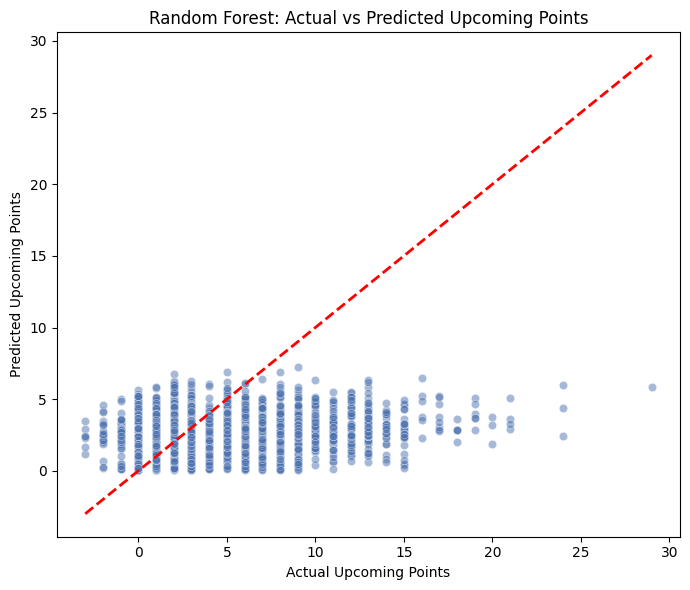

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


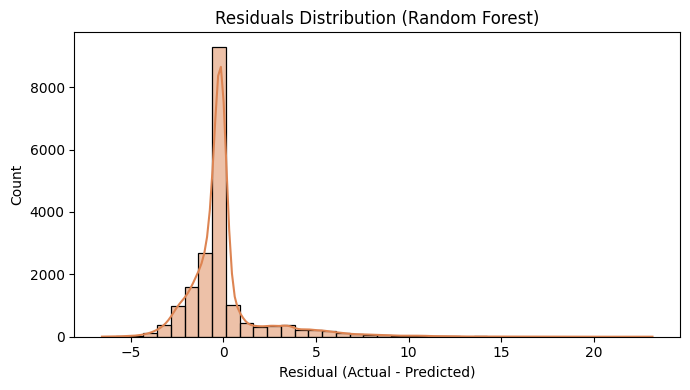

In [85]:
# Visualization

# Actual vs Predicted
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color="#4C72B0")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Random Forest: Actual vs Predicted Upcoming Points")
plt.xlabel("Actual Upcoming Points")
plt.ylabel("Predicted Upcoming Points")
plt.tight_layout()
plt.show()

# Residual distribution
residuals = y_test - y_pred_rf
plt.figure(figsize=(7,4))
sns.histplot(residuals, bins=40, kde=True, color="#DD8452")
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [86]:
#Inference Function

def make_fpl_prediction(player_info, model_choice="Random Forest", show_all=False):
    """
    Predict upcoming FPL points for a given player using raw match statistics.
    Applies the same preprocessing used during training and returns
    a natural-language explanation of the prediction.
    """

   
    needed_features = [
        "assists", "bonus", "bps", "clean_sheets", "goals_conceded",
        "goals_scored", "minutes", "own_goals", "penalties_missed",
        "penalties_saved", "red_cards", "saves", "yellow_cards",
        "creativity", "influence", "threat", "ict_index",
        "value", "selected", "form", "position"
    ]
    missing = [f for f in needed_features if f not in player_info]
    if missing:
        raise ValueError(f"Missing player info fields: {missing}")

    # --- Create zero-filled feature row matching training data ---
    model_features = X_train.columns.tolist()
    feature_row = {col: 0 for col in model_features}

    # --- Fill numeric stats ---
    for key, val in player_info.items():
        if key in feature_row:
            feature_row[key] = val

    # --- Encode position (pos_DEF, pos_MID, etc.) ---
    position = player_info["position"].upper()
    for pos in ["GK", "DEF", "MID", "FWD"]:
        col_name = f"pos_{pos}"
        if col_name in feature_row:
            feature_row[col_name] = 1 if pos == position else 0

    # --- Recreate engineered features if present in training ---
    if "goal_involvement" in feature_row:
        feature_row["goal_involvement"] = (
            player_info.get("goals_scored", 0) + player_info.get("assists", 0)
        )

    if "performance_momentum" in feature_row:
        feature_row["performance_momentum"] = (
            player_info.get("form", 0) * (player_info.get("minutes", 0) / 90)
        )

    if "recent_performance_index" in feature_row:
        feature_row["recent_performance_index"] = (
            player_info.get("form", 0) * player_info.get("minutes", 0)
            + player_info.get("bps", 0)
            + player_info.get("bonus", 0)
        )

    # --- Convert to DataFrame ---
    X_input = pd.DataFrame([feature_row], columns=model_features).fillna(0)

    # --- Predict with Random Forest 
    preds = {}
    preds["Random Forest"] = rf_progress.predict(X_input)[0]

    # --- Output section ---
    if show_all:
        print("Predictions from all available models:")
        for model, pred in preds.items():
            print(f"• {model}: {pred:.2f} points")
        return preds
    else:
        prediction = preds[model_choice]
        position = player_info.get("position", "Unknown")
        minutes = player_info.get("minutes", "N/A")
        form = player_info.get("form", "N/A")
        print("--------------------------------------------------")
        print(f"📊 {model_choice} Prediction Summary")
        print("--------------------------------------------------")
        print(
            f"Based on the player's current week stats "
            f"(Position: {position}, Form: {form}, Minutes: {minutes}),\n"
            f"the model predicts approximately **{prediction:.2f} FPL points** "
            f"in the next gameweek."
        )
        print("--------------------------------------------------")
        return prediction


In [87]:
# Example 1 – Active midfielder
player1 = {
    "position": "MID", "minutes": 88, "goals_scored": 1, "assists": 1,
    "bonus": 2, "bps": 34, "clean_sheets": 0, "goals_conceded": 0,
    "own_goals": 0, "penalties_missed": 0, "penalties_saved": 0,
    "red_cards": 0, "saves": 0, "yellow_cards": 0,
    "creativity": 55.0, "influence": 63.4, "threat": 78.2,
    "ict_index": 18.4, "value": 106.0, "selected": 30.2, "form": 6.9,
}

# Example 2 – Defender who barely played
player2 = {
    "position": "DEF", "minutes": 15, "goals_scored": 0, "assists": 0,
    "bonus": 0, "bps": 5, "clean_sheets": 0, "goals_conceded": 2,
    "own_goals": 0, "penalties_missed": 0, "penalties_saved": 0,
    "red_cards": 0, "saves": 0, "yellow_cards": 1,
    "creativity": 1.8, "influence": 3.9, "threat": 0.5,
    "ict_index": 0.7, "value": 45.5, "selected": 2.3, "form": 1.1,
}

# Run both examples
make_fpl_prediction(player1)
make_fpl_prediction(player2)


--------------------------------------------------
📊 Random Forest Prediction Summary
--------------------------------------------------
Based on the player's current week stats (Position: MID, Form: 6.9, Minutes: 88),
the model predicts approximately **5.52 FPL points** in the next gameweek.
--------------------------------------------------
--------------------------------------------------
📊 Random Forest Prediction Summary
--------------------------------------------------
Based on the player's current week stats (Position: DEF, Form: 1.1, Minutes: 15),
the model predicts approximately **1.97 FPL points** in the next gameweek.
--------------------------------------------------


1.9749968397686346

In [88]:

# ================== MODEL ==================
input_dim = X_train_scaled.shape[1]

model = tf.keras.Sequential([
    # Block 1
    tf.keras.layers.Dense(256, kernel_initializer="he_normal",
                          kernel_regularizer=tf.keras.regularizers.l2(1e-4),
                          input_shape=(input_dim,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(tf.keras.activations.gelu),   # or "relu" if TF<2.8
    tf.keras.layers.Dropout(0.20),

    # Block 2
    tf.keras.layers.Dense(128, kernel_initializer="he_normal",
                          kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(tf.keras.activations.gelu),
    tf.keras.layers.Dropout(0.15),

    # Block 3
    tf.keras.layers.Dense(64, kernel_initializer="he_normal",
                          kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(tf.keras.activations.gelu),
    tf.keras.layers.Dropout(0.10),

    # Narrow head
    tf.keras.layers.Dense(32, kernel_initializer="he_normal",
                          kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(tf.keras.activations.gelu),

    # Linear regression output
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=["mae"]
)

model.summary()

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
2025-10-24 18:56:35.652269: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,377 (208.50 KB)

 Trainable params: 52,417 (204.75 KB)

 Non-trainable params: 960 (3.75 KB)

In [89]:


# ================== TRAINING ==================
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=8, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True, verbose=1)
]

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    callbacks=callbacks,
    verbose=1
)



Epoch 1/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 7.5811 - mae: 1.6677 - val_loss: 5.0271 - val_mae: 1.2202 - learning_rate: 0.0010
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.8139 - mae: 1.2381 - val_loss: 4.8269 - val_mae: 1.2273 - learning_rate: 0.0010
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.9115 - mae: 1.2487 - val_loss: 4.8234 - val_mae: 1.2137 - learning_rate: 0.0010
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.7250 - mae: 1.2331 - val_loss: 4.8030 - val_mae: 1.1921 - learning_rate: 0.0010
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.7594 - mae: 1.2312 - val_loss: 4.8023 - val_mae: 1.2074 - learning_rate: 0.0010
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.7307 - mae: 1.2219 - val_loss: 4.7803 - val_mae: 1.2142 - learning_rate: 0.0010
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.7773 - mae: 1.2375 - val_loss: 4.7870 - val_mae: 1.2462 - learning_rate:


=== Model Evaluation ===
 Train ⇒ MAE=1.195 | MSE=4.578 | RMSE=2.140 | R²=0.293
  Test ⇒ MAE=1.185 | MSE=4.581 | RMSE=2.140 | R²=0.291

Baseline ⇒ MAE=1.699 | MSE=6.465 | RMSE=2.543 | R²=-0.000


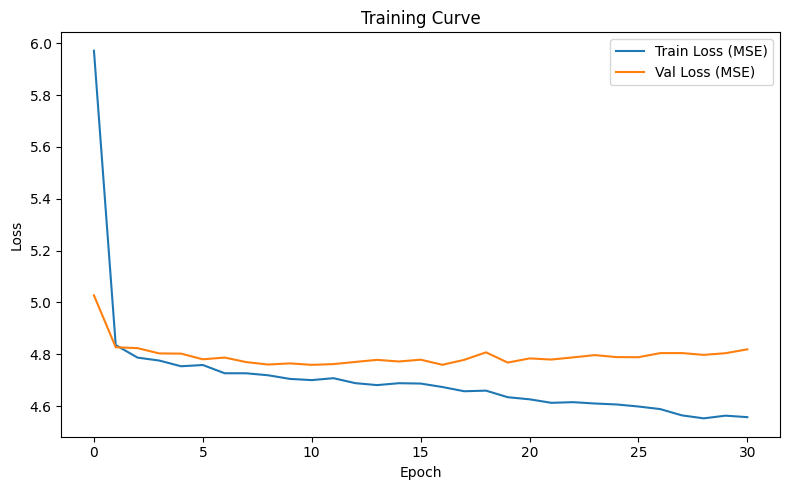

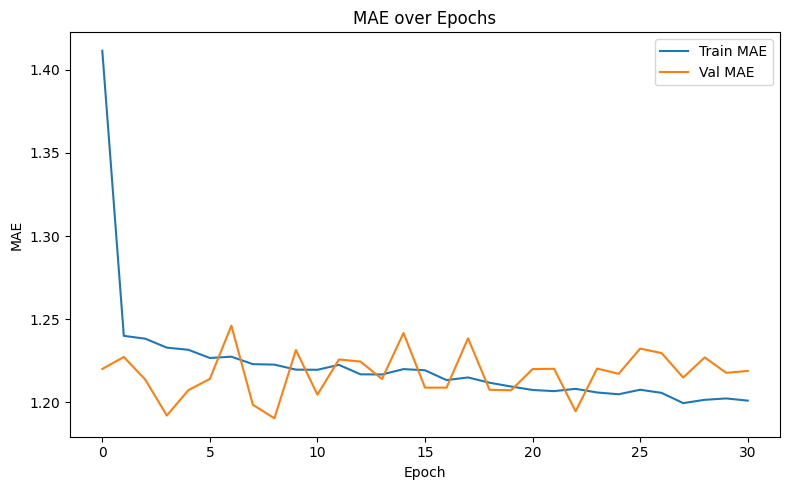

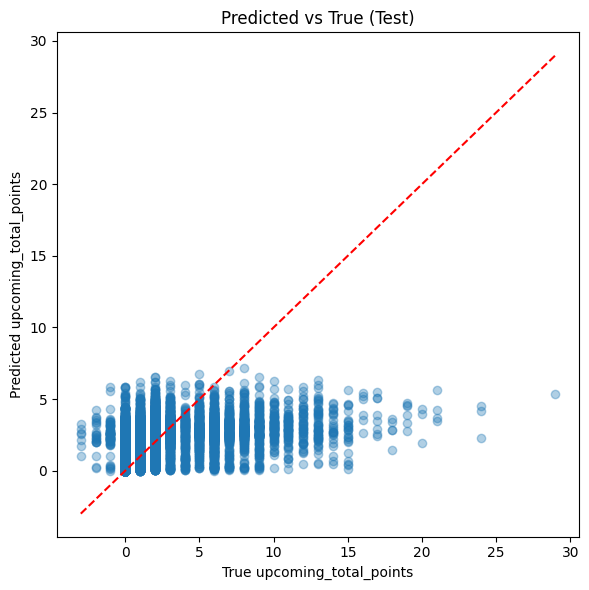

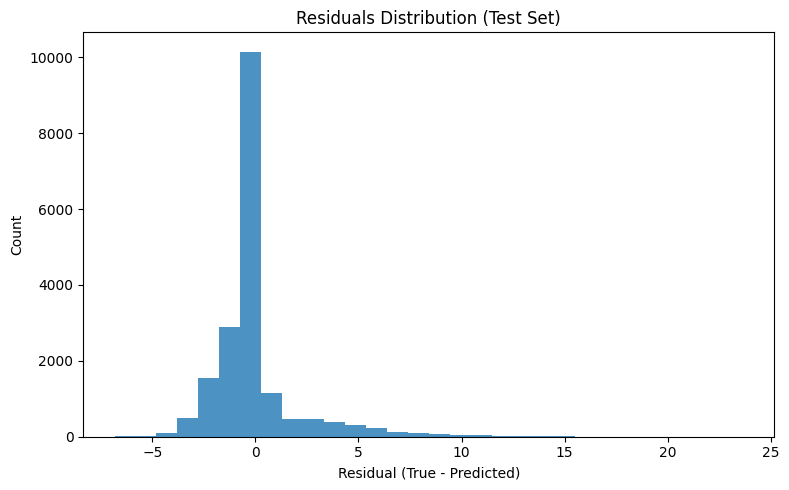

In [90]:
# ================== EVALUATION ==================
def eval_regression(name, X, y):
    preds = model.predict(X, verbose=0).ravel()
    mae  = mean_absolute_error(y, preds)
    mse  = mean_squared_error(y, preds)
    rmse = np.sqrt(mse)
    r2   = r2_score(y, preds)
    print(f"{name:>6} ⇒ MAE={mae:.3f} | MSE={mse:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")
    return preds, {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

print("\n=== Model Evaluation ===")
y_train_pred, train_metrics = eval_regression("Train", X_train_scaled, y_train)
y_test_pred,  test_metrics  = eval_regression(" Test", X_test_scaled, y_test)

# ================== BASELINE ==================
mean_pred = np.full_like(y_test, np.mean(y_train))
baseline_mae  = mean_absolute_error(y_test, mean_pred)
baseline_mse  = mean_squared_error(y_test, mean_pred)
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2   = r2_score(y_test, mean_pred)

print(f"\nBaseline ⇒ MAE={baseline_mae:.3f} | MSE={baseline_mse:.3f} | RMSE={baseline_rmse:.3f} | R²={baseline_r2:.3f}")

# ================== TRAINING CURVES ==================
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('Training Curve')
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch'); plt.ylabel('MAE')
plt.title('MAE over Epochs')
plt.legend(); plt.tight_layout(); plt.show()

# ================== PREDICTED vs TRUE ==================
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.35)
lo, hi = min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())
plt.plot([lo, hi], [lo, hi], 'r--')
plt.xlabel('True upcoming_total_points')
plt.ylabel('Predicted upcoming_total_points')
plt.title('Predicted vs True (Test)')
plt.tight_layout(); plt.show()

# ================== RESIDUALS ==================
plt.figure(figsize=(8,5))
residuals = y_test - y_test_pred
plt.hist(residuals, bins=30, alpha=0.8)
plt.xlabel('Residual (True - Predicted)')
plt.ylabel('Count')
plt.title('Residuals Distribution (Test Set)')
plt.tight_layout(); plt.show()


In [91]:
# ================== NEW MODEL (FFNN v2): FEATURES ==================
# Start from your already-built df_model (with upcoming_total_points ready)
df_model2 = df_model.sort_values(["name", "season_x", "GW"]).copy()

# Safe lags/rollings (shift(1) ensures only past info is used)
df_model2["total_points_L1"] = df_model2.groupby(["name","season_x"])["total_points"].shift(1)
df_model2["minutes_L1"]      = df_model2.groupby(["name","season_x"])["minutes"].shift(1)
df_model2["minutes_L3m"]     = df_model2.groupby(["name","season_x"])["minutes"].shift(1).rolling(3).mean()
df_model2["pts_L5_std"]      = df_model2.groupby(["name","season_x"])["total_points"].shift(1).rolling(5).std()

# Drop early-season rows with missing engineered features
eng_cols2 = ["total_points_L1","minutes_L1","minutes_L3m","pts_L5_std"]
df_model2 = df_model2.dropna(subset=eng_cols2).copy()

print("New engineered features added for v2:", eng_cols2)
df_model2[["name","season_x","GW","total_points","upcoming_total_points"] + eng_cols2].head(8)


New engineered features added for v2: ['total_points_L1', 'minutes_L1', 'minutes_L3m', 'pts_L5_std']


,name,season_x,GW,total_points,upcoming_total_points,total_points_L1,minutes_L1,minutes_L3m,pts_L5_std
5,Aaron Connolly,2020-21,6,0,0.0,4.0,12.0,50.000000,2.792848
6,Aaron Connolly,2020-21,7,0,1.0,0.0,0.0,25.666667,3.033150
7,Aaron Connolly,2020-21,8,1,0.0,0.0,0.0,4.000000,1.673320
8,Aaron Connolly,2020-21,9,0,2.0,1.0,4.0,1.333333,1.673320
9,Aaron Connolly,2020-21,10,2,2.0,0.0,0.0,1.333333,1.732051
10,Aaron Connolly,2020-21,11,2,1.0,2.0,62.0,22.000000,0.894427
11,Aaron Connolly,2020-21,12,1,0.0,2.0,63.0,41.666667,1.000000
12,Aaron Connolly,2020-21,13,0,2.0,1.0,28.0,51.000000,0.836660


In [92]:
# ================== NEW MODEL (FFNN v2): PREPROCESS ==================
# Use the same base features you had, plus the engineered ones
match_features2 = [
    "assists", "bonus", "bps", "clean_sheets", "goals_conceded",
    "goals_scored", "minutes", "own_goals", "penalties_missed",
    "penalties_saved", "red_cards", "saves", "yellow_cards",
    "was_home", "team_h_score", "team_a_score", "fixture", "GW"
]
player_features2 = ["position", "creativity", "influence", "threat", "ict_index", "value", "form", "selected"]
engineered_features2 = ["total_points_L1","minutes_L1","minutes_L3m","pts_L5_std"]

features2 = match_features2 + player_features2 + engineered_features2

# One-hot for position (same style as original)
df_enc2 = pd.get_dummies(df_model2, columns=["position"], prefix="pos")
pos_cols2 = [c for c in df_enc2.columns if c.startswith("pos_")]
features2_final = [c for c in features2 if c != "position"] + pos_cols2

# Fill NA and build X2, y2
df_enc2[features2_final] = df_enc2[features2_final].fillna(0)
X2 = df_enc2[features2_final].copy()
y2 = df_enc2["upcoming_total_points"].astype(float).copy()

print("X2 shape:", X2.shape, "| y2 shape:", y2.shape)

# Split (same 80/20 style as your original to keep comparison simple)
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.20, random_state=42, shuffle=True
)

# Scale numerics for NN stability (fit on train, transform test)
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled  = scaler2.transform(X2_test)

print("Train rows (v2):", X2_train.shape[0], "| Test rows (v2):", X2_test.shape[0])

X2 shape: (79636, 33) | y2 shape: (79636,)
Train rows (v2): 63708 | Test rows (v2): 15928


In [93]:
# ================== NEW MODEL (FFNN v2): ARCHITECTURE ==================
import tensorflow as tf

input_dim2 = X2_train_scaled.shape[1]

model2 = tf.keras.Sequential([
    # Input robustness
    tf.keras.layers.Input(shape=(input_dim2,)),
    tf.keras.layers.GaussianNoise(0.05),

    # Block 1 (wider, normalize then activate)
    tf.keras.layers.Dense(192, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.AlphaDropout(0.25),

    tf.keras.layers.Dense(96, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.AlphaDropout(0.20),

    tf.keras.layers.Dense(48, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.AlphaDropout(0.15),

    tf.keras.layers.Dense(24, activation='selu', kernel_initializer='lecun_normal'),

    tf.keras.layers.Dense(1)
])

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss=tf.keras.losses.Huber(delta=2.0),
    metrics=["mae"]
)

model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 33)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 192)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout (AlphaDropout)    │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 96)             │        18,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_1 (AlphaDropout)  │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 48)             │         4,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_2 (AlphaDropout)  │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 24)             │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,913 (120.75 KB)

 Trainable params: 30,913 (120.75 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
callbacks2 = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=5, min_lr=1e-6, verbose=1, mode='min'),
    tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=12, restore_best_weights=True, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint('best_ffnn_v2.keras', monitor='val_mae', mode='min', save_best_only=True, verbose=1)
]

history2 = model2.fit(
    X2_train_scaled, y2_train,
    validation_split=0.2,
    epochs=200,
    batch_size=256,
    callbacks=callbacks2,
    verbose=1
)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def eval_regression_with(model_obj, name, X, y):
    preds = model_obj.predict(X, verbose=0).ravel()
    mae = mean_absolute_error(y, preds)
    mse = mean_squared_error(y, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, preds)
    print(f"{name:>6} ⇒ MAE={mae:.3f} | MSE={mse:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")
    return preds, {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

print("\n=== FFNN v2 Evaluation ===")
y2_train_pred, train2_metrics = eval_regression_with(model2, 'Train', X2_train_scaled, y2_train)
y2_test_pred, test2_metrics = eval_regression_with(model2, 'Test', X2_test_scaled, y2_test)

import pandas as pd
compare_df2 = pd.DataFrame([
    {"Model":"Original FFNN", "Split":"Train", **train_metrics},
    {"Model":"Original FFNN", "Split":"Test", **test_metrics},
    {"Model":"FFNN v2", "Split":"Train", **train2_metrics},
    {"Model":"FFNN v2", "Split":"Test", **test2_metrics},
])[['Model','Split','MAE','MSE','RMSE','R2']]

compare_df2

Epoch 1/200
190/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9749 - mae: 1.6297
Epoch 1: val_mae improved from inf to 1.91468, saving model to best_ffnn_v2.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.9600 - mae: 1.6190 - val_loss: 2.2609 - val_mae: 1.9147 - learning_rate: 3.0000e-04
Epoch 2/200
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4327 - mae: 1.2192
Epoch 2: val_mae improved from 1.91468 to 1.60344, saving model to best_ffnn_v2.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4326 - mae: 1.2190 - val_loss: 1.8222 - val_mae: 1.6034 - learning_rate: 3.0000e-04
Epoch 3/200
191/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4114 - mae: 1.1869
Epoch 3: val_mae improved from 1.60344 to 1.44053, saving model to best_ffnn_v2.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4101 - mae: 1.1862 - val_loss: 1.7358 - val_mae: 1.4405 - learning_rate: 3.0000e-04
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3567 - mae: 1.1526
Epoch 4: val_

,Model,Split,MAE,MSE,RMSE,R2
0,Original FFNN,Train,1.194726,4.577921,2.139608,0.292647
1,Original FFNN,Test,1.185328,4.580891,2.140302,0.291443
2,FFNN v2,Train,1.201597,4.836020,2.199095,0.251610
3,FFNN v2,Test,1.203654,4.867864,2.206324,0.249059


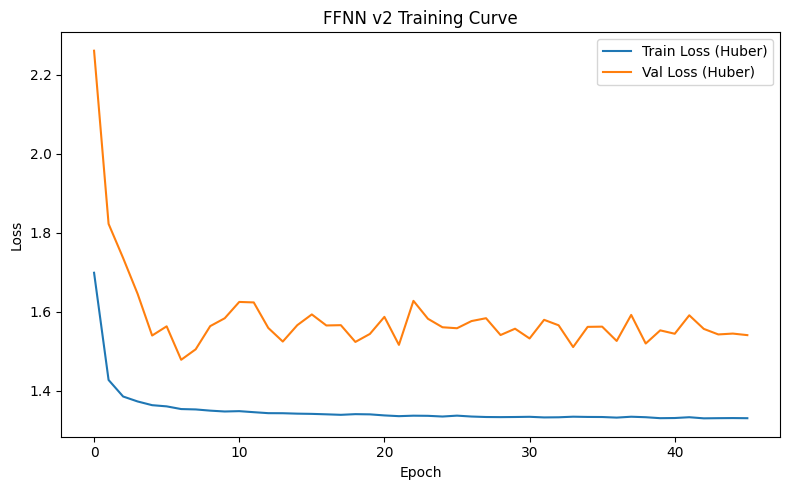

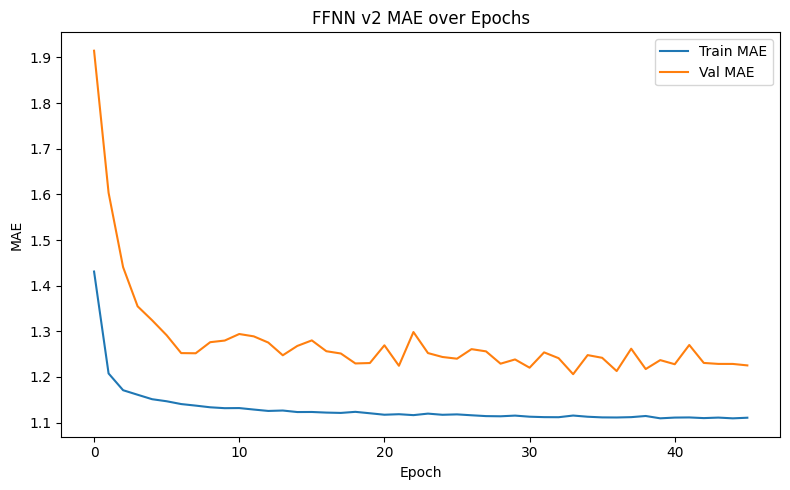

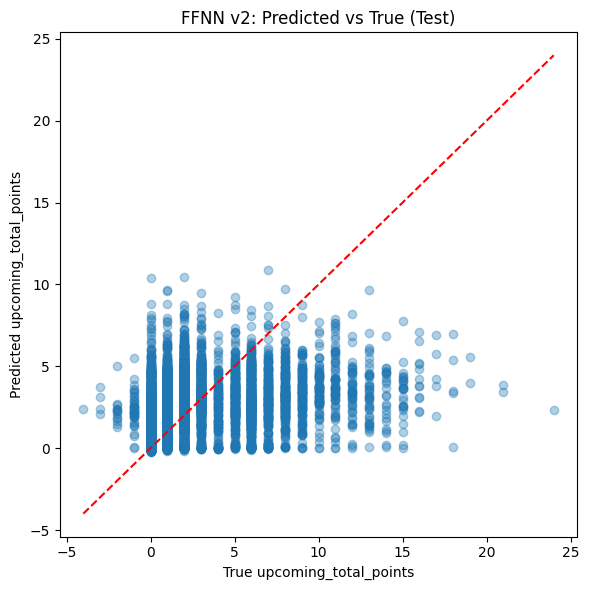

In [95]:
# Training curves (v2)
plt.figure(figsize=(8,5))
plt.plot(history2.history['loss'], label='Train Loss (Huber)')
plt.plot(history2.history['val_loss'], label='Val Loss (Huber)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('FFNN v2 Training Curve')
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
plt.plot(history2.history['mae'], label='Train MAE')
plt.plot(history2.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch'); plt.ylabel('MAE'); plt.title('FFNN v2 MAE over Epochs')
plt.legend(); plt.tight_layout(); plt.show()

# Predicted vs True (v2)
plt.figure(figsize=(6,6))
plt.scatter(y2_test, y2_test_pred, alpha=0.35)
lo2, hi2 = min(y2_test.min(), y2_test_pred.min()), max(y2_test.max(), y2_test_pred.max())
plt.plot([lo2, hi2], [lo2, hi2], 'r--')
plt.xlabel('True upcoming_total_points'); plt.ylabel('Predicted upcoming_total_points')
plt.title('FFNN v2: Predicted vs True (Test)')
plt.tight_layout(); plt.show()


In [96]:
# Model 2 Inference Function
def make_fpl_prediction_tf(player, model, scaler, features):
    """Simplified FPL prediction using TensorFlow Model 1."""
    
    # Create feature row
    row = {f: 0.0 for f in features}
    for k, v in player.items():
        if k in row:
            row[k] = float(v) if v is not None else 0.0

    # Encode player position
    pos_map = {
        "G": "GK", "GK": "GK", "GOALKEEPER": "GK",
        "D": "DEF", "DEFENDER": "DEF",
        "M": "MID", "MIDFIELDER": "MID",
        "F": "FWD", "FORWARD": "FWD", "ST": "FWD"
    }
    pos = pos_map.get(str(player.get("position", "")).upper(), "UNK")
    for p in ["GK", "DEF", "MID", "FWD"]:
        col = f"pos_{p}"
        if col in row:
            row[col] = 1.0 if p == pos else 0.0

    # Compute simple engineered features if they exist
    if "goal_involvement" in row:
        row["goal_involvement"] = float(player.get("goals_scored", 0)) + float(player.get("assists", 0))
    if "performance_momentum" in row:
        form = float(player.get("form", 0)); mins = float(player.get("minutes", 0))
        row["performance_momentum"] = form * (mins / 90.0)
    if "recent_performance_index" in row:
        row["recent_performance_index"] = (
            float(player.get("form", 0)) * float(player.get("minutes", 0))
            + float(player.get("bps", 0)) + float(player.get("bonus", 0))
        )

    # Prepare input DataFrame
    X = pd.DataFrame([row], columns=features).fillna(0.0)
    Xs = pd.DataFrame(scaler.transform(X), columns=features)

    # Predict
    pred = float(model.predict(Xs, verbose=0).ravel()[0])

    # Explanation summary
    position = player.get("position", "Unknown")
    form = player.get("form", "N/A")
    minutes = player.get("minutes", "N/A")
    explanation = (
        f"📊 TensorFlow Model Prediction\n"
        f"--------------------------------------------------\n"
        f"Based on the player's stats (Position: {position}, Form: {form}, Minutes: {minutes}),\n"
        f"the model predicts approximately *{pred:.2f} FPL points* in the next gameweek.\n"
        f"--------------------------------------------------"
    )

    return {"prediction": pred, "explanation": explanation, "input": X}

In [97]:
def make_fpl_prediction2(player, model, scaler, features):

    
    # Build base feature row
    row = {f: 0.0 for f in features}
    for k, v in player.items():
        if k in row:
            row[k] = float(v) if v is not None else 0.0

    # Compute engineered features from recent matches if available
    if "recent_matches" in player and isinstance(player["recent_matches"], list):
        recent = player["recent_matches"]
        pts = [m.get("total_points", 0) for m in recent]
        mins = [m.get("minutes", 0) for m in recent]

        row["total_points_L1"] = pts[-1] if len(pts) else 0
        row["minutes_L1"] = mins[-1] if len(mins) else 0
        row["minutes_L3m"] = np.mean(mins[-3:]) if mins else 0
        row["pts_L5_std"] = np.std(pts[-5:]) if pts else 0

    # Encode position
    pos = str(player.get("position", "")).upper()
    for p in ["GK", "DEF", "MID", "FWD"]:
        col = f"pos_{p}"
        if col in row:
            row[col] = 1.0 if p in pos else 0.0

    # Prepare input DataFrame
    X = pd.DataFrame([row], columns=features).fillna(0.0)
    Xs = pd.DataFrame(scaler.transform(X), columns=features)

    # Predict
    pred = float(model.predict(Xs, verbose=0).ravel()[0])

    # Create explanation
    position = player.get("position", "Unknown")
    form = player.get("form", "N/A")
    minutes = player.get("minutes", "N/A")
    explanation = (
        f"📊 Prediction Summary\n"
        f"--------------------------------------------------\n"
        f"Based on the player's stats (Position: {position}, Form: {form}, Minutes: {minutes}),\n"
        f"the model predicts approximately *{pred:.2f} FPL points* in the next gameweek.\n"
        f"--------------------------------------------------"
    )

    return {"prediction": pred, "explanation": explanation, "input": X}

In [98]:
# Test Data for 2 players
player_tf_A = {
    "assists": 1, "bonus": 2, "bps": 38, "clean_sheets": 0, "goals_conceded": 0,
    "goals_scored": 1, "minutes": 90, "own_goals": 0, "penalties_missed": 0,
    "penalties_saved": 0, "red_cards": 0, "saves": 0, "yellow_cards": 1,
    "creativity": 45.3, "influence": 120.5, "threat": 70.0, "ict_index": 235.8,
    "value": 9.5, "selected": 2500000, "form": 6.4, "position": "MID",
    "was_home": 1, "team_h_score": 2, "team_a_score": 0, "fixture": 101, "GW": 9
}

player_tf_B = {
    "assists": 0, "bonus": 1, "bps": 22, "clean_sheets": 1, "goals_conceded": 0,
    "goals_scored": 0, "minutes": 90, "own_goals": 0, "penalties_missed": 0,
    "penalties_saved": 0, "red_cards": 0, "saves": 0, "yellow_cards": 0,
    "creativity": 12.0, "influence": 55.0, "threat": 10.0, "ict_index": 77.0,
    "value": 5.0, "selected": 600000, "form": 5.1, "position": "DEF",
    "was_home": 0, "team_h_score": 1, "team_a_score": 1, "fixture": 102, "GW": 9
}

# For v2: one with engineered features, one that uses recent_matches:
player_v2_A_direct = { **player_tf_A,
    "total_points_L1": 7.0, "minutes_L1": 90.0, "minutes_L3m": 85.0, "pts_L5_std": 1.6
}

player_v2_B_recent = { **player_tf_B,
    "recent_matches": [
        {"total_points": 2.0, "minutes": 60.0},
        {"total_points": 6.0, "minutes": 90.0},
        {"total_points": 5.0, "minutes": 80.0},
        {"total_points": 3.0, "minutes": 70.0},
        {"total_points": 4.0, "minutes": 90.0},
    ]
}
print("Player dicts created.")

Player dicts created.


In [99]:
# --- Predict FPL Points for Two Players (Fixed & Simplified) ---
import os, joblib, tensorflow as tf

display_model_label = "FFNN"

# ✅ Check that the function and player data exist
if 'make_fpl_prediction_tf' not in globals():
    raise RuntimeError("❌ Define make_fpl_prediction_tf first.")
if 'player_tf_A' not in globals() or 'player_tf_B' not in globals():
    raise RuntimeError("❌ Define player_tf_A and player_tf_B first.")

# ✅ Load model (memory → file)
m = globals().get('model') or globals().get('model2')
if m is None:
    if os.path.exists("model.h5"):
        m = tf.keras.models.load_model("model.h5"); print("Loaded model.h5")
    elif os.path.exists("model2.h5"):
        m = tf.keras.models.load_model("model2.h5"); print("Loaded model2.h5")
    else:
        raise RuntimeError("❌ No TF model found in memory or file.")

# ✅ Load scaler (optional)
s = globals().get('scaler') or globals().get('scaler2')
if s is None:
    if os.path.exists("scaler.pkl"):
        s = joblib.load("scaler.pkl"); print("Loaded scaler.pkl")
    elif os.path.exists("scaler2.pkl"):
        s = joblib.load("scaler2.pkl"); print("Loaded scaler2.pkl")

# ✅ Determine feature list
feats = globals().get('model_features') or None
if feats is None:
    if 'X_train_scaled' in globals() and hasattr(globals()['X_train_scaled'], 'columns'):
        feats = list(globals()['X_train_scaled'].columns)
    elif 'X_train' in globals() and hasattr(globals()['X_train'], 'columns'):
        feats = list(globals()['X_train'].columns)
if feats is None:
    raise RuntimeError("❌ Could not find features. Ensure X_train/X_train_scaled or model_features exists.")

# ✅ Pretty-print helper
def pretty_print_single(pred, info, label=display_model_label):
    print("--------------------------------------------------")
    print(f"📊 {label} Prediction Summary")
    print("--------------------------------------------------")
    print(f"Based on the player's current week stats (Position: {info.get('position')}, Form: {info.get('form')}, Minutes: {info.get('minutes')}),")
    print(f"the model predicts approximately *{pred:.2f} FPL points* in the next gameweek.")
    print("--------------------------------------------------")

# ✅ Run predictions
outA = make_fpl_prediction_tf(player_tf_A, m, s, feats)
pretty_print_single(outA["prediction"], player_tf_A)

outB = make_fpl_prediction_tf(player_tf_B, m, s, feats)
pretty_print_single(outB["prediction"], player_tf_B)

--------------------------------------------------
📊 FFNN Prediction Summary
--------------------------------------------------
Based on the player's current week stats (Position: MID, Form: 6.4, Minutes: 90),
the model predicts approximately *8.72 FPL points* in the next gameweek.
--------------------------------------------------
--------------------------------------------------
📊 FFNN Prediction Summary
--------------------------------------------------
Based on the player's current week stats (Position: DEF, Form: 5.1, Minutes: 90),
the model predicts approximately *4.36 FPL points* in the next gameweek.
--------------------------------------------------


In [100]:
# --- Predict FPL Points for Two Players (Model v2) ---
import os, joblib, tensorflow as tf

display_model2_label = "FFNN v2"

# ✅ Check required definitions
if 'make_fpl_prediction2' not in globals():
    raise RuntimeError("❌ Define make_fpl_prediction2 first.")
if 'player_v2_A_direct' not in globals() or 'player_v2_B_recent' not in globals():
    raise RuntimeError("❌ Define player_v2_A_direct and player_v2_B_recent first.")

# ✅ Load model (prefer in-memory → fallback to file)
m2 = globals().get('model2') or globals().get('model')
if m2 is None:
    if os.path.exists("model2.h5"):
        m2 = tf.keras.models.load_model("model2.h5"); print("Loaded model2.h5")
    elif os.path.exists("model.h5"):
        m2 = tf.keras.models.load_model("model.h5"); print("Loaded model.h5")
    else:
        raise RuntimeError("❌ No TF model found (model2.h5/model.h5).")

# ✅ Load scaler
s2 = globals().get('scaler2') or globals().get('scaler')
if s2 is None:
    if os.path.exists("scaler2.pkl"):
        s2 = joblib.load("scaler2.pkl"); print("Loaded scaler2.pkl")
    elif os.path.exists("scaler.pkl"):
        s2 = joblib.load("scaler.pkl"); print("Loaded scaler.pkl")

# ✅ Determine features
feats2 = globals().get('model2_features') or globals().get('features2_final')
if feats2 is None:
    if 'X2' in globals() and hasattr(globals()['X2'], 'columns'):
        feats2 = list(globals()['X2'].columns)
if feats2 is None:
    raise RuntimeError("❌ Could not find model2 features. Ensure X2/model2_features exist.")

# ✅ Pretty printer
def pretty_print_single_v2(pred, info, label=display_model2_label):
    print("--------------------------------------------------")
    print(f"📊 {label} Prediction Summary")
    print("--------------------------------------------------")
    print(f"Based on the player's current week stats (Position: {info.get('position')}, Form: {info.get('form')}, Minutes: {info.get('minutes')}),")
    print(f"the model predicts approximately *{pred:.2f} FPL points* in the next gameweek.")
    print("--------------------------------------------------")

# ✅ Run predictions
outA2 = make_fpl_prediction2(player_v2_A_direct, m2, s2, feats2)
pretty_print_single_v2(outA2["prediction"], player_v2_A_direct)

outB2 = make_fpl_prediction2(player_v2_B_recent, m2, s2, feats2)
pretty_print_single_v2(outB2["prediction"], player_v2_B_recent) 

--------------------------------------------------
📊 FFNN v2 Prediction Summary
--------------------------------------------------
Based on the player's current week stats (Position: MID, Form: 6.4, Minutes: 90),
the model predicts approximately *13.15 FPL points* in the next gameweek.
--------------------------------------------------
--------------------------------------------------
📊 FFNN v2 Prediction Summary
--------------------------------------------------
Based on the player's current week stats (Position: DEF, Form: 5.1, Minutes: 90),
the model predicts approximately *7.76 FPL points* in the next gameweek.
--------------------------------------------------


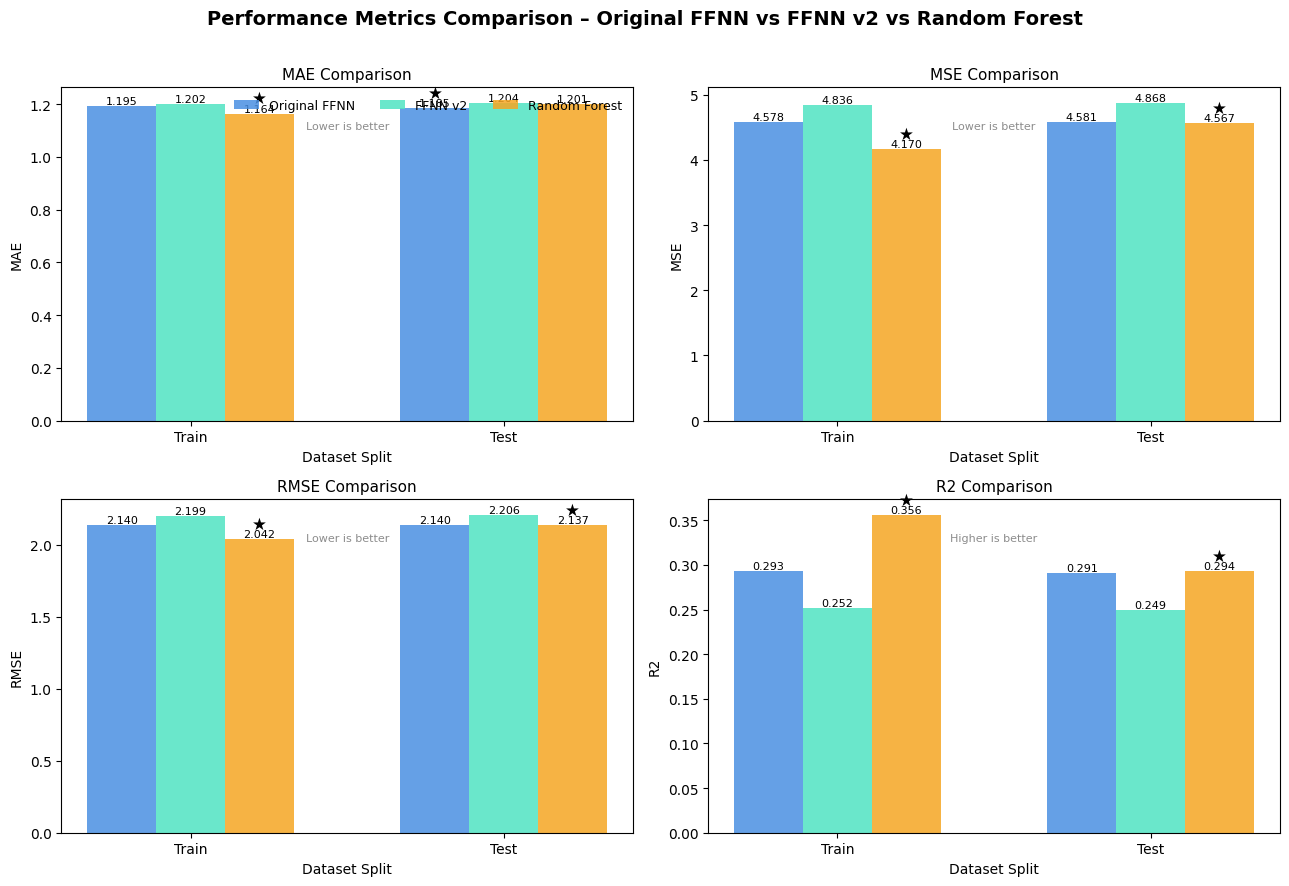

In [101]:
# ================== FULL GRAPHICAL COMPARISON (FFNN v1 vs FFNN v2 vs Random Forest) ==================
import matplotlib.pyplot as plt
import numpy as np
import math

# ---- Configuration ----
metrics_names = ["MAE", "MSE", "RMSE", "R2"]
splits = ["Train", "Test"]
models = ["Original FFNN", "FFNN v2", "Random Forest"]
colors = ["#4a90e2", "#50e3c2", "#f5a623"]  # blue, teal, amber

# ---- Gather data (ensure these dicts exist in your session) ----
data = {
    "Original FFNN": {
        "Train": train_metrics,
        "Test":  test_metrics
    },
    "FFNN v2": {
        "Train": train2_metrics,
        "Test":  test2_metrics
    },
    "Random Forest": {
        "Train": rf_train_metrics,
        "Test":  rf_test_metrics
    }
}

# ---- Helper: pick “best” depending on metric direction ----
lower_is_better = {"MAE", "MSE", "RMSE"}
higher_is_better = {"R2"}

def best_index(values, metric):
    vals = np.array(values, dtype=float)
    if metric in lower_is_better:
        return int(np.nanargmin(vals))
    elif metric in higher_is_better:
        return int(np.nanargmax(vals))
    else:
        return int(np.nanargmin(vals))  # default fallback

# ---- Plot ----
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
axes = axes.ravel()

bar_width = 0.22
x = np.arange(len(splits))  # [0, 1] for Train/Test

for i, metric in enumerate(metrics_names):
    ax = axes[i]

    # Build an array of shape (num_models, num_splits)
    vals = []
    for m in models:
        vals.append([float(data[m][s][metric]) for s in splits])
    vals = np.array(vals)  # shape = (3, 2)

    # Create grouped bars for each model
    offsets = (np.arange(len(models)) - (len(models)-1)/2) * bar_width
    for m_idx, m in enumerate(models):
        ax.bar(x + offsets[m_idx], vals[m_idx], bar_width, label=m, color=colors[m_idx], alpha=0.85)

        # Annotate each bar height
        for s_idx, v in enumerate(vals[m_idx]):
            ax.text(
                x[s_idx] + offsets[m_idx],
                v,
                f"{v:.3f}",
                ha="center",
                va="bottom",
                fontsize=8,
                rotation=0
            )

    # Mark the best model per split with a small star above the bar
    for s_idx, split in enumerate(splits):
        winners_vals = [vals[m_idx, s_idx] for m_idx in range(len(models))]
        w_idx = best_index(winners_vals, metric)
        # Place a star a bit above the winning bar
        win_x = x[s_idx] + offsets[w_idx]
        win_y = vals[w_idx, s_idx]
        ax.text(win_x, win_y * (1.02 if win_y != 0 else 1.02), "★", ha="center", va="bottom", fontsize=12)

    ax.set_xticks(x)
    ax.set_xticklabels(splits)
    ax.set_title(f"{metric} Comparison", fontsize=11)
    ax.set_xlabel("Dataset Split")
    ax.set_ylabel(metric)

    # Guidance text
    guidance = "Lower is better" if metric in lower_is_better else "Higher is better"
    ymax = np.nanmax(vals) if not math.isinf(np.nanmax(vals)) else 1.0
    ax.text(0.5, ymax * 0.92 if ymax != 0 else 0.92, guidance, ha='center', fontsize=8, color="gray", alpha=0.9)

    if i == 0:
        ax.legend(ncols=3, fontsize=9, frameon=False, loc="upper right")

plt.suptitle("Performance Metrics Comparison – Original FFNN vs FFNN v2 vs Random Forest", fontsize=14, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


  0%|          | 0/300 [00:00<?, ?it/s]

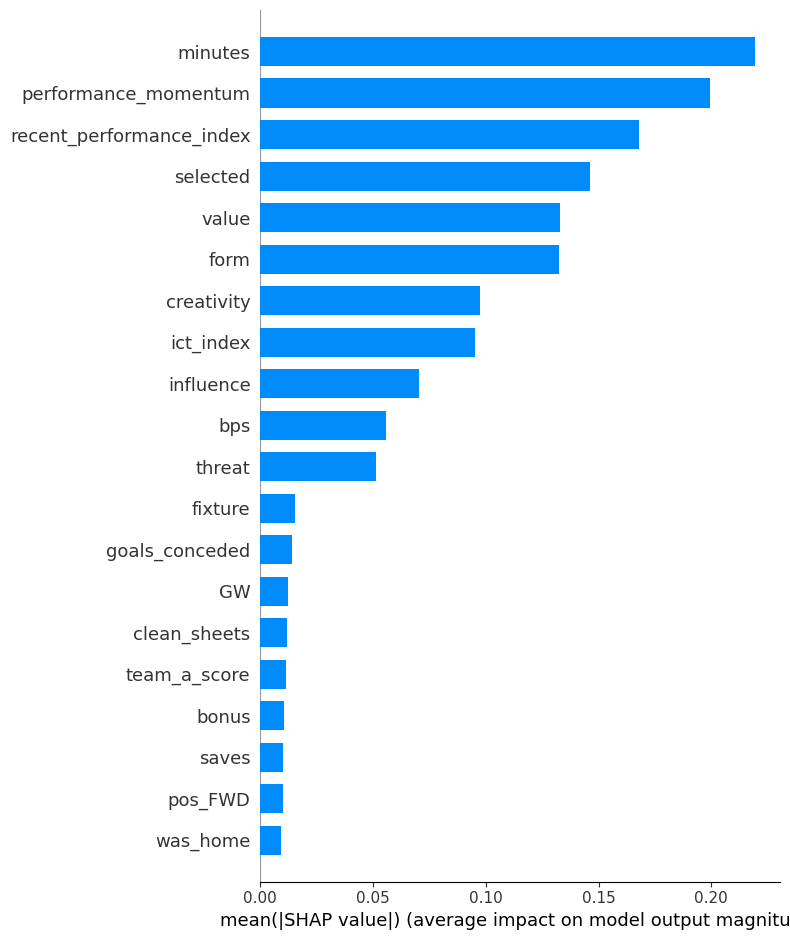

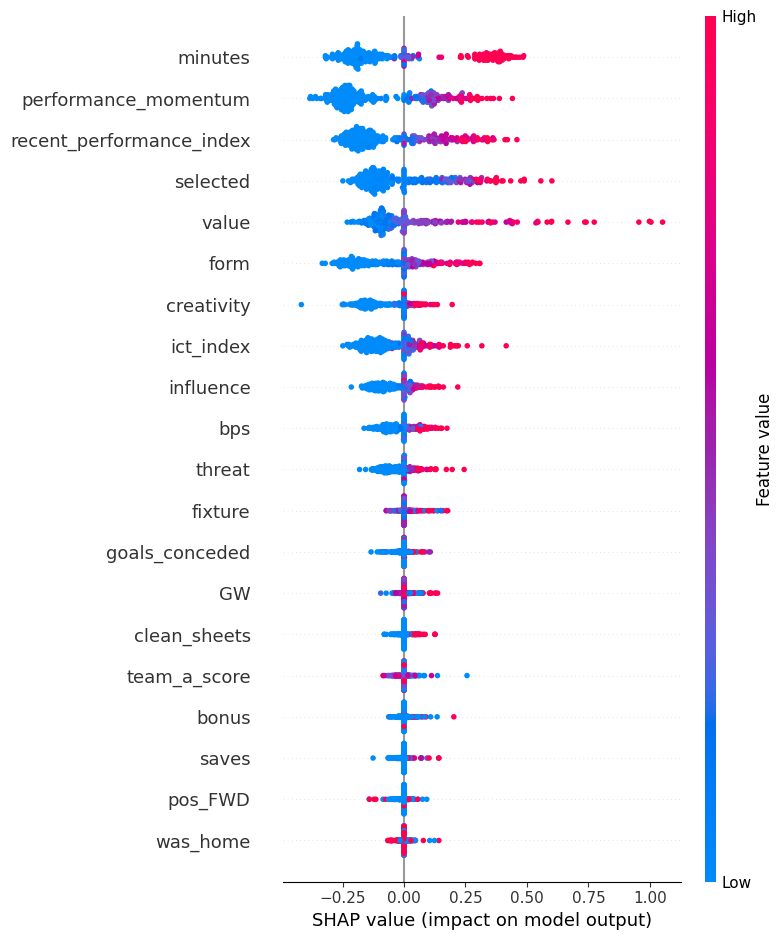

In [112]:
# ================== OPTIMIZED SHAP: GLOBAL EXPLANATION (Random Forest Regressor) ==================
import shap
import numpy as np
import pandas as pd

# --- Ensure we know the exact feature column order used during training ---
if isinstance(X_train, pd.DataFrame):
    feature_cols = list(X_train.columns)
else:
    # Fallback: use your known list
    feature_cols = features_final  # must match training exactly

# --- Safe DataFrame wrappers (model expects DataFrame with column names) ---
def to_df(X):
    return X if isinstance(X, pd.DataFrame) else pd.DataFrame(X, columns=feature_cols)

# 1) Summarize training background with k-means (KernelExplainer wants arrays; that's fine)
background_summary_rf = shap.kmeans(to_df(X_train).values, 50)

# 2) Prediction function (wrap to restore column names)
def f_pred_rf(X):
    X_df = to_df(X)               # ensure columns are attached
    return rf_progress.predict(X_df).ravel()

# 3) KernelExplainer with summarized background
explainer_rf = shap.KernelExplainer(f_pred_rf, background_summary_rf)

# 4) Explain a smaller test subset (e.g., 300 rows)
X_test_df = to_df(X_test)
n_explain_rf = min(300, X_test_df.shape[0])
X_sub = X_test_df.iloc[:n_explain_rf]

shap_vals_rf = explainer_rf.shap_values(X_sub.values, nsamples=100)

# 5) Global importance — bar
shap.summary_plot(
    shap_vals_rf,
    X_sub,                        # pass DataFrame to keep feature names in the plot
    feature_names=feature_cols,
    plot_type='bar',
    show=True
)

# 6) Beeswarm — direction & density
shap.summary_plot(
    shap_vals_rf,
    X_sub,
    feature_names=feature_cols,
    show=True
)


  0%|          | 0/1 [00:00<?, ?it/s]

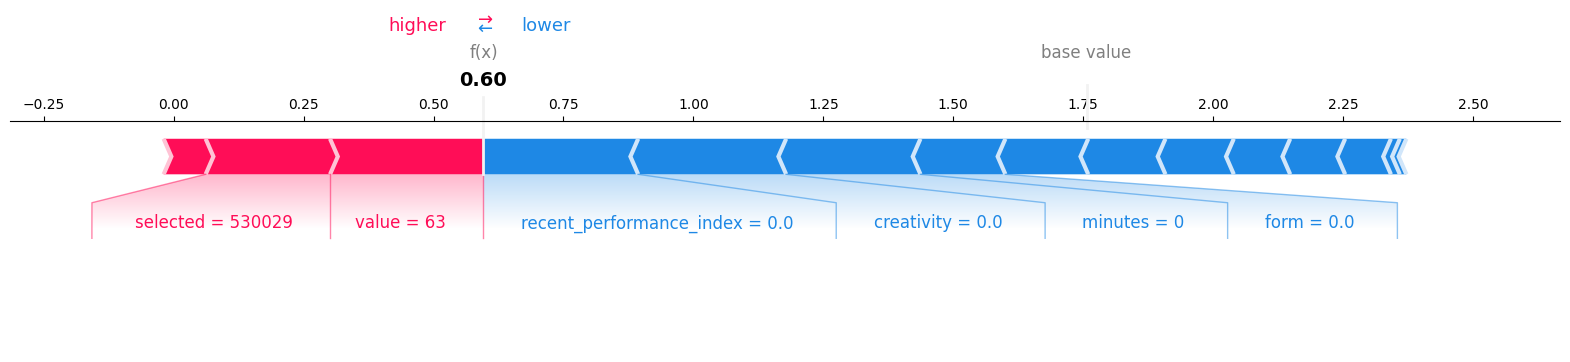

In [115]:
# ================== LOCAL SHAP: SINGLE INSTANCE (Index 10, Random Forest Regressor) ==================
import shap
import numpy as np

# Select one test sample to explain (index 10)
idx = 10
X_row = X_test.iloc[[idx]] if hasattr(X_test, "iloc") else np.asarray(X_test)[[idx]]

# Compute SHAP values for that instance
shap_values_row = explainer_rf.shap_values(X_row, nsamples=100)

# ---- Local explanation plot ----
# Shows each feature’s contribution to the prediction for this sample
shap.force_plot(
    explainer_rf.expected_value,
    shap_values_row,
    X_row,
    feature_names=features_final,
    matplotlib=True
)


X does not have valid feature names, but RandomForestRegressor was fitted with feature names



LIME explanation for test index 0 (Random Forest Regressor):
  0.00 < minutes <= 90.00                             +0.4718
  recent_performance_index > 27.50                    +0.4673
  performance_momentum > 0.15                         +0.4120
  form > 0.23                                         +0.3279
  own_goals <= 0.00                                   -0.2754
  ict_index > 2.50                                    +0.2532
  44.00 < value <= 48.00                              -0.2046
  creativity > 2.70                                   +0.2028
  5504.00 < selected <= 27687.00                      -0.1838
  penalties_missed <= 0.00                            -0.1127


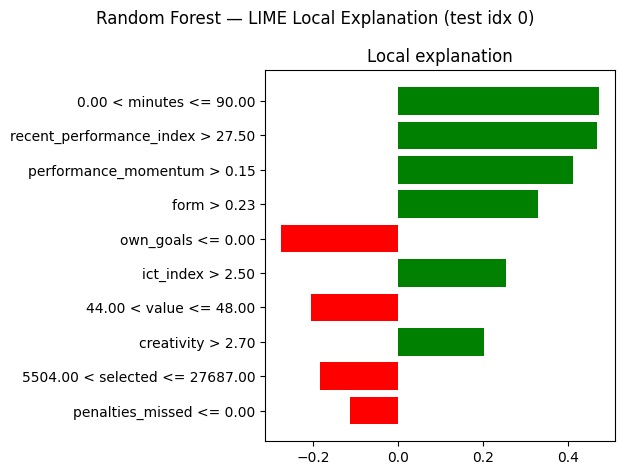

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



LIME explanation for test index 50 (Random Forest Regressor):
  minutes <= 0.00                                     -0.4474
  recent_performance_index <= 0.00                    -0.4254
  performance_momentum <= 0.00                        -0.4198
  form <= 0.00                                        -0.2626
  ict_index <= 0.00                                   -0.2337
  creativity <= 0.00                                  -0.2104
  bps <= 0.00                                         -0.1508
  influence <= 0.00                                   -0.1398
  clean_sheets <= 0.00                                -0.1352
  threat <= 0.00                                      -0.1125


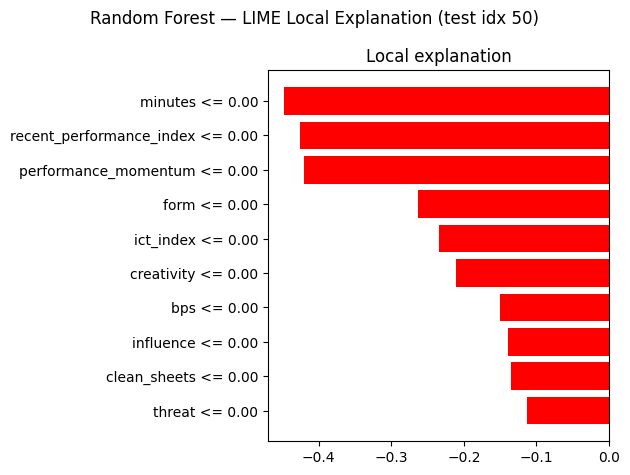

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



LIME explanation for test index 200 (Random Forest Regressor):
  value > 55.00                                       +0.4750
  minutes <= 0.00                                     -0.4349
  performance_momentum <= 0.00                        -0.4274
  recent_performance_index <= 0.00                    -0.4261
  ict_index <= 0.00                                   -0.2497
  own_goals <= 0.00                                   -0.2406
  5504.00 < selected <= 27687.00                      -0.1944
  creativity <= 0.00                                  -0.1722
  influence <= 0.00                                   -0.1513
  penalties_saved <= 0.00                             -0.1276


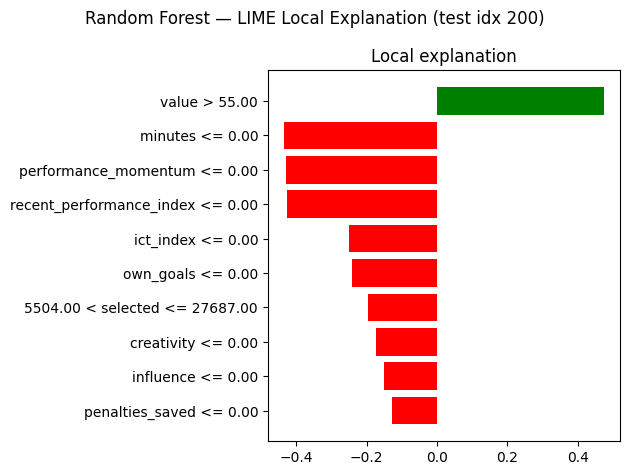

In [116]:
# ================== LIME: LOCAL EXPLANATIONS (Random Forest Regressor) ==================
from lime.lime_tabular import LimeTabularExplainer

lime_exp_rf = LimeTabularExplainer(
    training_data=X_train.values if hasattr(X_train, "values") else X_train,
    feature_names=features_final,
    mode='regression',
    discretize_continuous=True,   # matches your FFNN style
    random_state=42               # set seed for reproducibility
)

# Pick a few test instances (mirrors your FFNN pattern)
instances_rf = [0, min(50, X_test.shape[0]-1), min(200, X_test.shape[0]-1)]

lime_explanations_rf = []
for i in instances_rf:
    exp = lime_exp_rf.explain_instance(
        data_row=(X_test.values[i] if hasattr(X_test, "values") else X_test[i]),
        predict_fn=lambda X: rf_progress.predict(X).ravel(),
        num_features=10
    )
    lime_explanations_rf.append(exp)

    # Text summary
    print(f"\nLIME explanation for test index {i} (Random Forest Regressor):")
    for feat, weight in exp.as_list():
        print(f"  {feat:50s}  {weight:+.4f}")

    # Plot
    fig = exp.as_pyplot_figure()
    fig.suptitle(f"Random Forest — LIME Local Explanation (test idx {i})")
    plt.tight_layout()
    plt.show()

  0%|          | 0/300 [00:00<?, ?it/s]

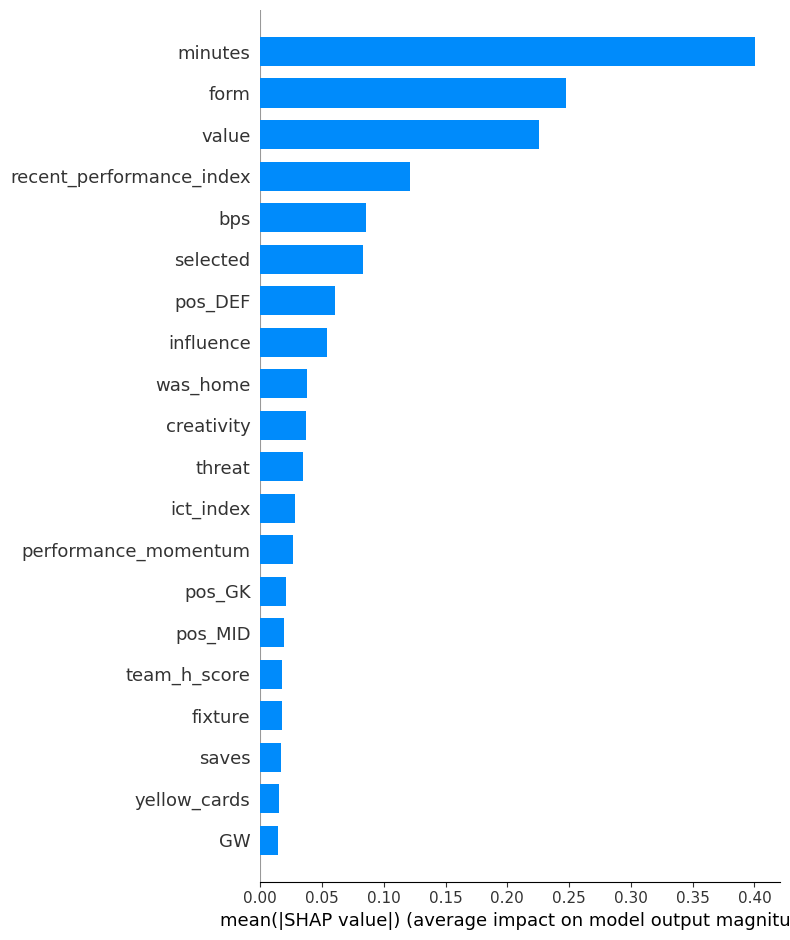

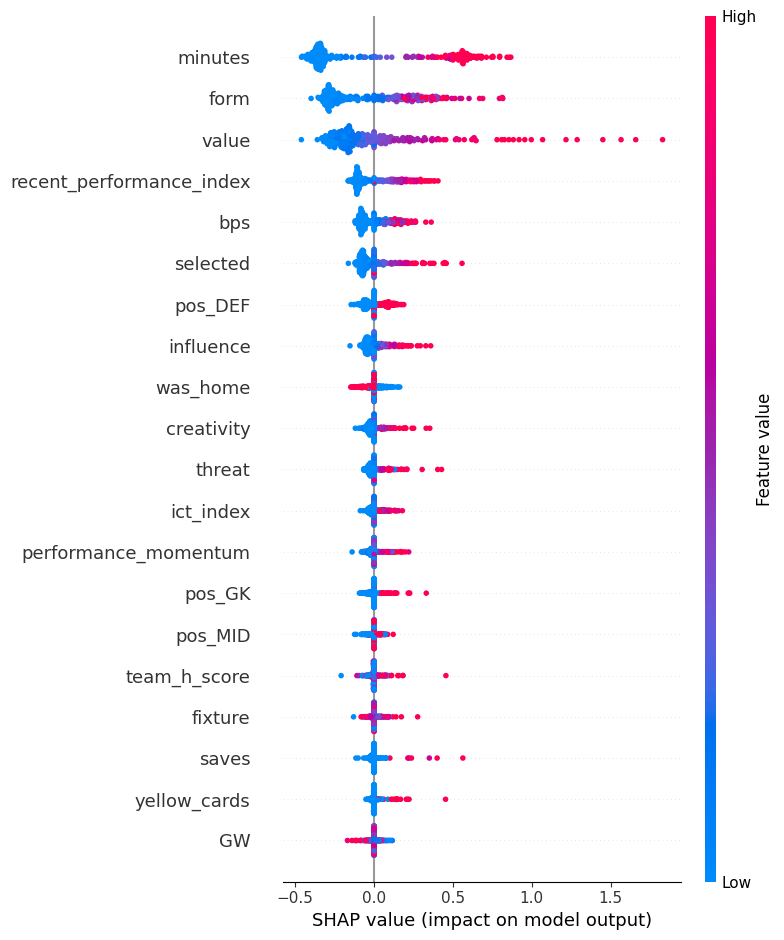

In [105]:
# ================== OPTIMIZED SHAP: GLOBAL EXPLANATION (Original FFNN) ==================
import shap


# Summarize the training data background with k-means (K=50 works well)
background_summary = shap.kmeans(X_train_scaled, 50)

# Prediction function
f_pred = lambda X: model.predict(X, verbose=0).ravel()

# Initialize KernelExplainer with summarized background
explainer_ffnn = shap.KernelExplainer(f_pred, background_summary)

# Explain a smaller test subset (e.g., 300 rows)
n_explain = min(300, X_test_scaled.shape[0])
shap_vals_ffnn = explainer_ffnn.shap_values(X_test_scaled[:n_explain], nsamples=100)

# 1) Global importance (bar)
shap.summary_plot(shap_vals_ffnn, X_test_scaled[:n_explain],
                  feature_names=features_final, plot_type='bar', show=True)

# 2) Beeswarm plot (shows direction & density)
shap.summary_plot(shap_vals_ffnn, X_test_scaled[:n_explain],
                  feature_names=features_final, show=True)


In [106]:
# ================== SHAP Local Explanation (Original FFNN) ==================


background_summary = shap.kmeans(X_train_scaled, 50)


f_pred = lambda X: model.predict(X, verbose=0).ravel()

explainer_ffnn = shap.KernelExplainer(f_pred, background_summary)

i = 22

x_row = X_test_scaled[i].reshape(1, -1)

shap_vals_single = explainer_ffnn.shap_values(
    x_row,
    nsamples=100
)


shap.initjs()

shap.force_plot(
    explainer_ffnn.expected_value,   
    shap_vals_single[0],             
    x_row[0],                         
    feature_names=features_final
)


  0%|          | 0/1 [00:00<?, ?it/s]


LIME explanation for test index 0 (Original FFNN):
  penalties_saved <= -0.03                            -0.9468
  red_cards <= -0.04                                  +0.9150
  penalties_missed <= -0.03                           -0.8209
  saves <= -0.16                                      -0.5381
  form > 0.49                                         +0.4737
  own_goals <= -0.04                                  -0.4192
  recent_performance_index > 0.54                     +0.3725
  -0.58 < value <= -0.27                              -0.3401
  -0.80 < minutes <= 1.41                             +0.3071
  goals_scored <= -0.19                               +0.2868


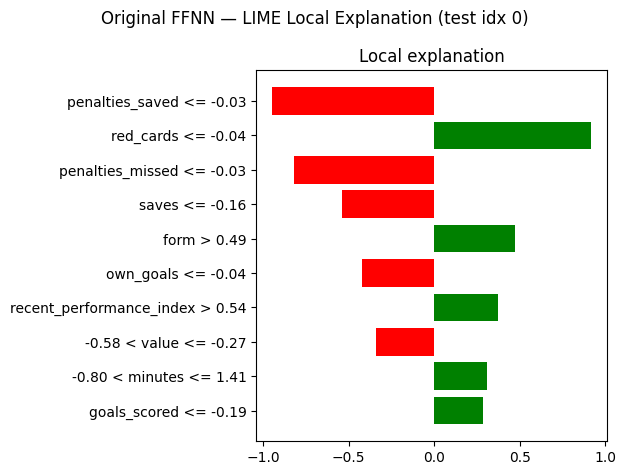


LIME explanation for test index 50 (Original FFNN):
  penalties_missed <= -0.03                           -1.0942
  penalties_saved <= -0.03                            -0.9322
  red_cards <= -0.04                                  +0.8719
  saves <= -0.16                                      -0.4640
  own_goals <= -0.04                                  -0.3829
  form <= -0.73                                       -0.3770
  yellow_cards <= -0.24                               -0.3025
  minutes <= -0.80                                    -0.2910
  recent_performance_index <= -0.66                   -0.2830
  bps <= -0.62                                        -0.1638


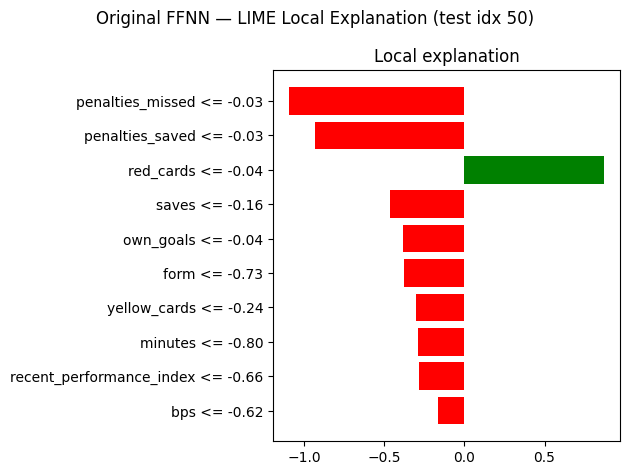


LIME explanation for test index 200 (Original FFNN):
  red_cards <= -0.04                                  +1.1069
  penalties_missed <= -0.03                           -1.0784
  penalties_saved <= -0.03                            -0.9903
  value > 0.29                                        +0.9845
  saves <= -0.16                                      -0.4134
  minutes <= -0.80                                    -0.2879
  recent_performance_index <= -0.66                   -0.2811
  pos_GK <= -0.35                                     -0.2577
  yellow_cards <= -0.24                               -0.2263
  goals_scored <= -0.19                               +0.2189


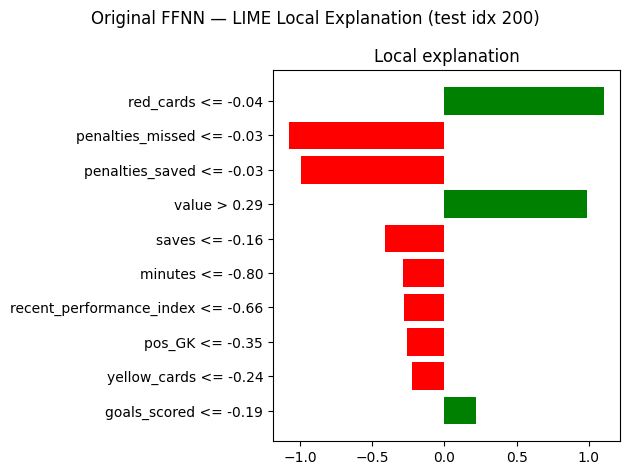

In [107]:
# ================== LIME: LOCAL EXPLANATIONS (Original FFNN) ==================
from lime.lime_tabular import LimeTabularExplainer

lime_exp_ffnn = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features_final,
    mode='regression',
    discretize_continuous=True,      # easier to read bins
    random_state=42
)

# Pick a few test instances (you can change these indices)
instances = [0, min(50, X_test_scaled.shape[0]-1), min(200, X_test_scaled.shape[0]-1)]

lime_explanations = []
for i in instances:
    exp = lime_exp_ffnn.explain_instance(
        data_row=X_test_scaled[i],
        predict_fn=lambda X: model.predict(X, verbose=0).ravel(),
        num_features=10
    )
    lime_explanations.append(exp)
    # Text summary
    print(f"\nLIME explanation for test index {i} (Original FFNN):")
    for feat, weight in exp.as_list():
        print(f"  {feat:50s}  {weight:+.4f}")
    # Plot
    fig = exp.as_pyplot_figure()
    fig.suptitle(f"Original FFNN — LIME Local Explanation (test idx {i})")
    plt.tight_layout()
    plt.show()


  0%|          | 0/300 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=1.718e-02, with an active set of 14 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 34 iterations, i.e. alpha=1.240e-03, with an active set of 24 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 40 iterations, i.e. alpha=4.951e-04, with an active set of 30 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 42 iterations, i.e. alpha=1.249e-04, with an active set of 32 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.


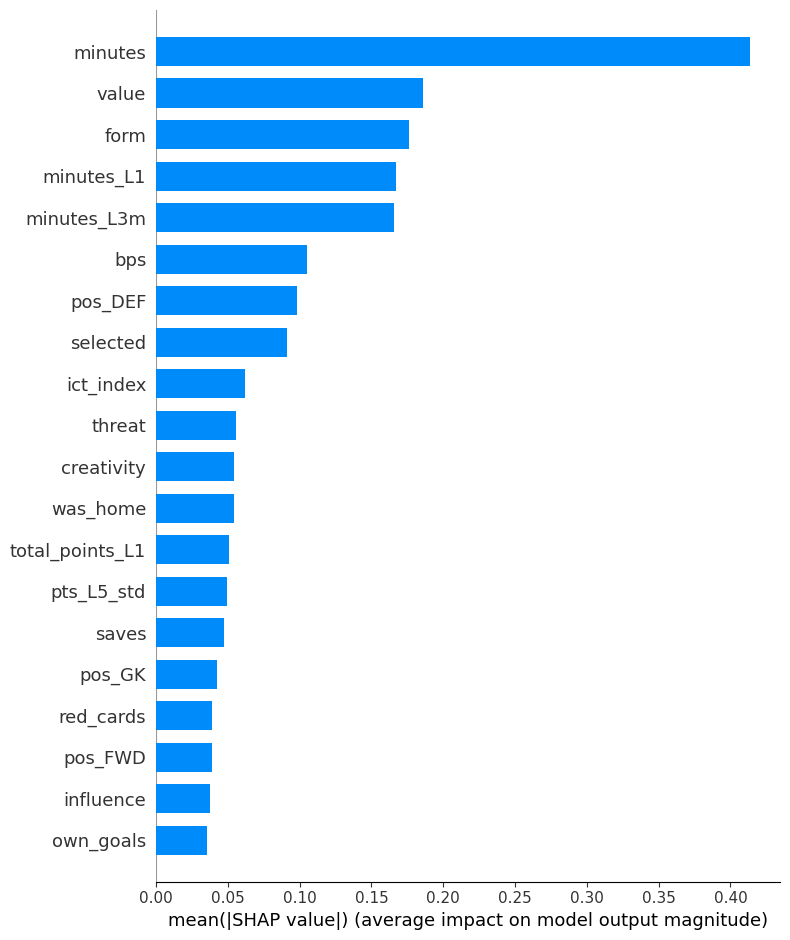

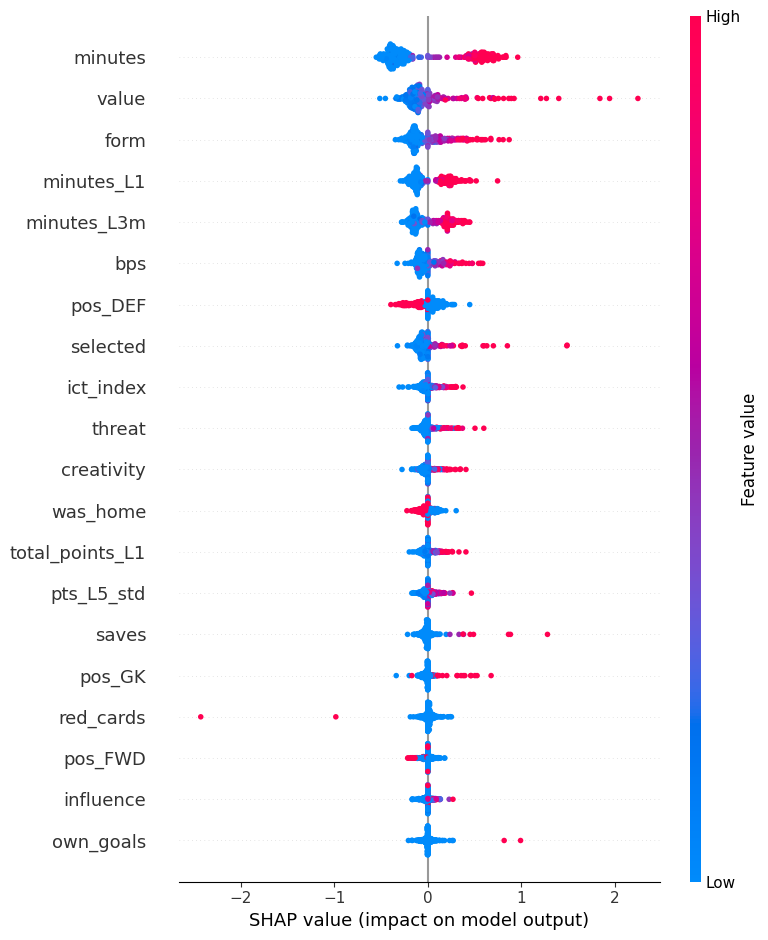

In [108]:
# ================== OPTIMIZED SHAP: GLOBAL EXPLANATION (FFNN v2) ==================
# Summarize background with k-means (K=50 to 100)
background_summary2 = shap.kmeans(X2_train_scaled, 50)

f_pred2 = lambda X: model2.predict(X, verbose=0).ravel()

explainer_ffnn2 = shap.KernelExplainer(f_pred2, background_summary2)

n_explain2 = min(300, X2_test_scaled.shape[0])
shap_vals_ffnn2 = explainer_ffnn2.shap_values(X2_test_scaled[:n_explain2], nsamples=100)

# 1) Global importance (bar)
shap.summary_plot(shap_vals_ffnn2, X2_test_scaled[:n_explain2],
                  feature_names=features2_final, plot_type='bar', show=True)

# 2) Beeswarm
shap.summary_plot(shap_vals_ffnn2, X2_test_scaled[:n_explain2],
                  feature_names=features2_final, show=True)


In [109]:
# ================== SHAP Local Explanation (FFNN v2) ==================


background_summary2 = shap.kmeans(X2_train_scaled, 50)


f_pred2 = lambda X: model2.predict(X, verbose=0).ravel()


explainer_ffnn2 = shap.KernelExplainer(f_pred2, background_summary2)


i = 0


x_row = X2_test_scaled[i].reshape(1, -1)


shap_vals_single = explainer_ffnn2.shap_values(
    x_row,
    nsamples=100
)


shap.initjs()

shap.force_plot(
    explainer_ffnn2.expected_value,     
    shap_vals_single[0],               
    x_row[0],                           
    feature_names=features2_final
)


  0%|          | 0/1 [00:00<?, ?it/s]


LIME explanation for test index 0 (FFNN v2):
  red_cards <= -0.04                                  +1.7163
  saves <= -0.16                                      -0.9151
  own_goals <= -0.04                                  -0.6318
  penalties_missed <= -0.03                           -0.5607
  form <= -0.77                                       -0.4380
  minutes <= -0.80                                    -0.3686
  pos_DEF <= -0.74                                    +0.3627
  bps <= -0.62                                        -0.3180
  pos_GK <= -0.35                                     -0.2775
  selected <= -0.37                                   -0.2033


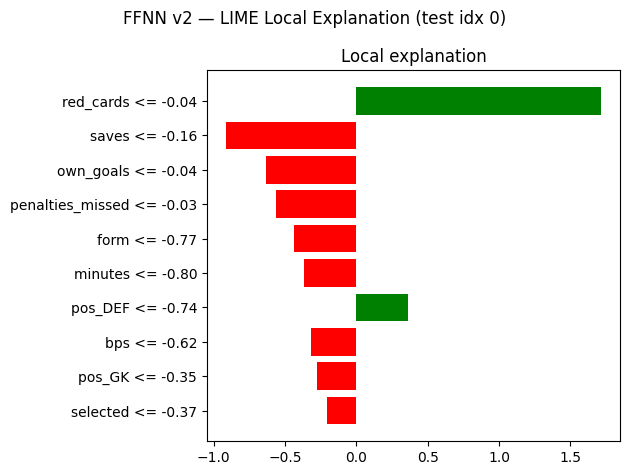


LIME explanation for test index 50 (FFNN v2):
  red_cards <= -0.04                                  +1.3977
  saves <= -0.16                                      -0.8793
  own_goals <= -0.04                                  -0.5425
  penalties_missed <= -0.03                           -0.4360
  form <= -0.77                                       -0.4340
  pos_DEF <= -0.74                                    +0.3892
  minutes <= -0.80                                    -0.3606
  pos_GK <= -0.35                                     -0.3364
  bps <= -0.62                                        -0.3283
  -0.58 < value <= -0.26                              -0.3024


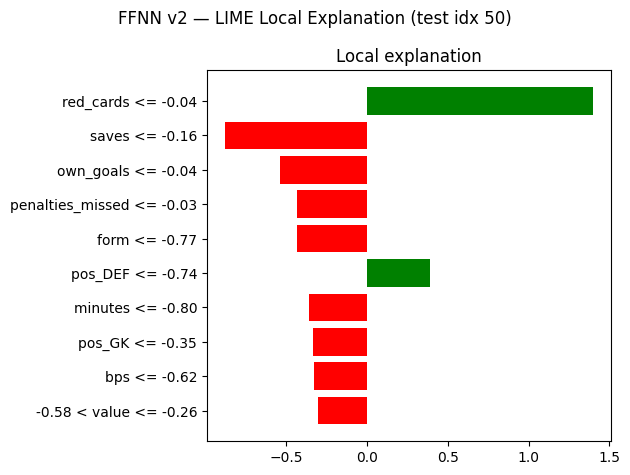


LIME explanation for test index 200 (FFNN v2):
  red_cards <= -0.04                                  +1.6508
  saves <= -0.16                                      -0.9576
  value <= -0.58                                      -0.5307
  form <= -0.77                                       -0.4410
  own_goals <= -0.04                                  -0.4085
  penalties_missed <= -0.03                           -0.3726
  minutes <= -0.80                                    -0.3508
  bps <= -0.62                                        -0.3498
  pos_DEF <= -0.74                                    +0.3167
  pos_GK > -0.35                                      +0.2613


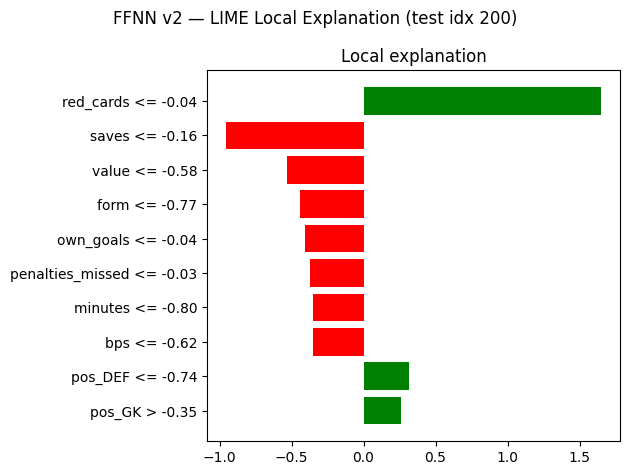

In [110]:
# ================== LIME: LOCAL EXPLANATIONS (FFNN v2) ==================
from lime.lime_tabular import LimeTabularExplainer

lime_exp_ffnn2 = LimeTabularExplainer(
    training_data=X2_train_scaled,
    feature_names=features2_final,
    mode='regression',
    discretize_continuous=True,
    random_state=24
)

instances_v2 = [0, min(50, X2_test_scaled.shape[0]-1), min(200, X2_test_scaled.shape[0]-1)]

lime_explanations_v2 = []
for i in instances_v2:
    exp = lime_exp_ffnn2.explain_instance(
        data_row=X2_test_scaled[i],
        predict_fn=lambda X: model2.predict(X, verbose=0).ravel(),
        num_features=10
    )
    lime_explanations_v2.append(exp)
    print(f"\nLIME explanation for test index {i} (FFNN v2):")
    for feat, weight in exp.as_list():
        print(f"  {feat:50s}  {weight:+.4f}")
    fig = exp.as_pyplot_figure()
    fig.suptitle(f"FFNN v2 — LIME Local Explanation (test idx {i})")
    plt.tight_layout()
    plt.show()


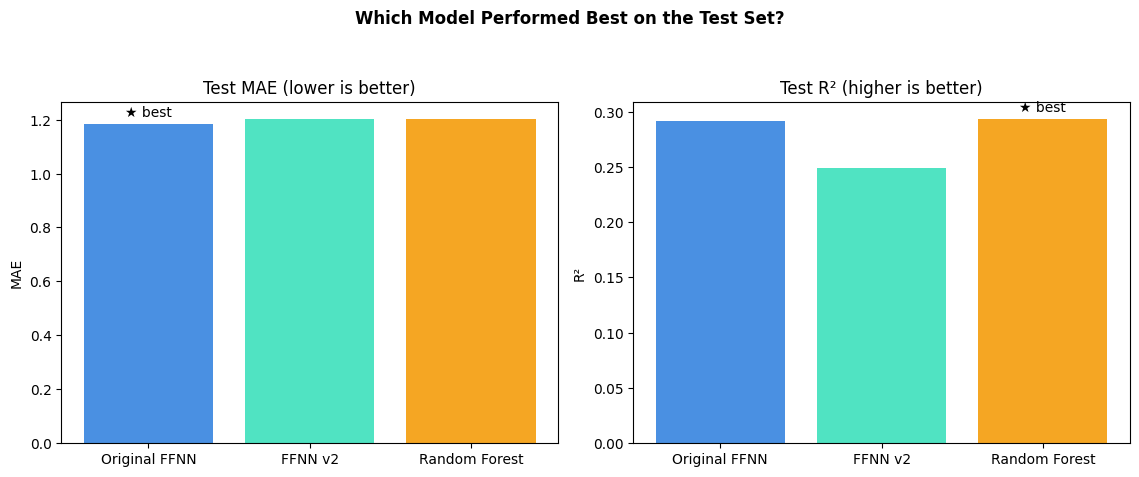

=== Final Verdict (Test set) ===
Best by MAE  : Original FFNN
Best by RMSE : Random Forest
Best by R²   : Random Forest
Overall (rank-sum across MAE & R²): Original FFNN


,Model,MAE,RMSE,R2
0,Original FFNN,1.185,2.140,0.291
1,FFNN v2,1.204,2.206,0.249
2,Random Forest,1.201,2.137,0.294


In [111]:
# ================== FINAL WINNER CHART (Original FFNN vs FFNN v2 vs Random Forest) ==================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Build summary table from your TEST metrics dicts ---
summary = pd.DataFrame([
    {"Model": "Original FFNN", "MAE": test_metrics["MAE"],  "RMSE": test_metrics["RMSE"],  "R2": test_metrics["R2"]},
    {"Model": "FFNN v2",       "MAE": test2_metrics["MAE"], "RMSE": test2_metrics["RMSE"], "R2": test2_metrics["R2"]},
    {"Model": "Random Forest", "MAE": rf_test_metrics["MAE"], "RMSE": rf_test_metrics["RMSE"], "R2": rf_test_metrics["R2"]},
])

# --- Winners per metric ---
winner_mae  = summary.loc[summary["MAE"].idxmin(),  "Model"]   # lower is better
winner_rmse = summary.loc[summary["RMSE"].idxmin(), "Model"]   # lower is better
winner_r2   = summary.loc[summary["R2"].idxmax(),   "Model"]   # higher is better

# --- Overall rank (keep same logic as your 2-model code: rank across MAE & R2) ---
rank_df = summary.assign(
    rank_MAE = summary["MAE"].rank(ascending=True,  method="min"),
    rank_R2  = summary["R2"].rank(ascending=False, method="min")
)
rank_df["rank_sum"] = rank_df["rank_MAE"] + rank_df["rank_R2"]
overall_winner = rank_df.loc[rank_df["rank_sum"].idxmin(), "Model"]

# --- Plot: left = Test MAE (lower better), right = Test R² (higher better) ---
fig, axes = plt.subplots(1, 2, figsize=(11.5, 4.5))

palette = ["#4a90e2", "#50e3c2", "#f5a623"]  # Original, v2, RF (blue, teal, amber)

# MAE bar
axes[0].bar(summary["Model"], summary["MAE"], color=palette)
axes[0].set_title("Test MAE (lower is better)")
axes[0].set_ylabel("MAE")
best_idx_mae = summary["MAE"].idxmin()
axes[0].annotate("★ best",
                 xy=(best_idx_mae, summary.loc[best_idx_mae, "MAE"]),
                 xytext=(0, 5), textcoords="offset points", ha="center")

# R2 bar
axes[1].bar(summary["Model"], summary["R2"], color=palette)
axes[1].set_title("Test R² (higher is better)")
axes[1].set_ylabel("R²")
best_idx_r2 = summary["R2"].idxmax()
axes[1].annotate("★ best",
                 xy=(best_idx_r2, summary.loc[best_idx_r2, "R2"]),
                 xytext=(0, 5), textcoords="offset points", ha="center")

plt.suptitle("Which Model Performed Best on the Test Set?", y=1.05, fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

# --- Textual verdict ---
print("=== Final Verdict (Test set) ===")
print(f"Best by MAE  : {winner_mae}")
print(f"Best by RMSE : {winner_rmse}")
print(f"Best by R²   : {winner_r2}")
print(f"Overall (rank-sum across MAE & R²): {overall_winner}")

# Styled summary table
display(
    summary.style
        .format({"MAE": "{:.3f}", "RMSE": "{:.3f}", "R2": "{:.3f}"})
        .set_caption("Test-set performance (3 models)")
)
